<div style= "background-color: #f8f9fa; color: #333; padding: 15px;">
    <a class="anchor" id="1st-bullet"></a>
    <h3 style="color: #198754;font-weight: bold;">DATA MINING GROUP PROJECT</h3>
    <h2 style="color: #198754; font-weight: bold;">BenefitsABCDEats Inc\. Final Reportt</h3>
    <h3 style="color: #198754;">Group 20</h3>
    Afonso Gamito, 20240752 <br>
    Gonçalo Pacheco, 20240695<br>
    Hassan Bhatti, 20241023<br>
    Moeko Mitani, 20240670 <br>
</div>

# Index

- [Import the Libraries and CVS file](#1) 
- [1. Check The Dataset](#2)
    - [1.1. Metadata](#3)
    - [1.2. Issues in The Dataset](#4)
- [2. Data Visualization](#5)
- [3. Key Statistics and Trends](#6)
- [4. Data Pre-Processing 1](#7)
    - [4.1. Treat Missing Values](#8)
    - [4.2. Change dtypes](#9)
    - [4.3. Treat Duplicates](#10)
- [5. Outliers](#11) 
- [6. New Features Creation](#12)
    - [6.1. Regional Demographic](#13)
    - [6.2. Total orders](#14)
    - [6.3. Average purchase](#15)
    - [6.4. Customer ordering level](#16)
    - [6.5. Customer ordering level](#17)
- [7. Data Pre-Processing 2](#18)
- [8. Feature Selection](#19)


<a class="anchor" id="1">     

# Import the Libraries and CVS file

</a>    

In [4]:
# Libraries
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.feature_selection import VarianceThreshold
from math import ceil
from itertools import product

In [5]:
# Import CVS file
file_path = 'project_data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)

<a class="anchor" id="2">     

# 1. Check The Dataset
</a>    

<a class="anchor" id="3">     

## 1.1. Metadata
</a>    

The training set contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [12]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [13]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


<a class="anchor" id="4">     

## 1.2. Issues in the dataset
</a>    

**Missing Values**
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-)

**Wrong dtypes**
- **'customer_region'** should be int instead of obj
- **'customer_age'** should be int instead of float
- **vendor_count** should be bool instead of int (conflict with Metadata)
- **'first_order'** should be int instead of float
- **'HR_0'** should be int instead of float

**Duplicates**
- 13 duplicates

<a class="anchor" id="5">     

# 2. Data Visualization
</a>    

## Histograms: *customer_age* and *vender_count*

### Remarks:
- The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 20s and early 30s.
- Most of the customers have ordered from less than four vendors in three months.


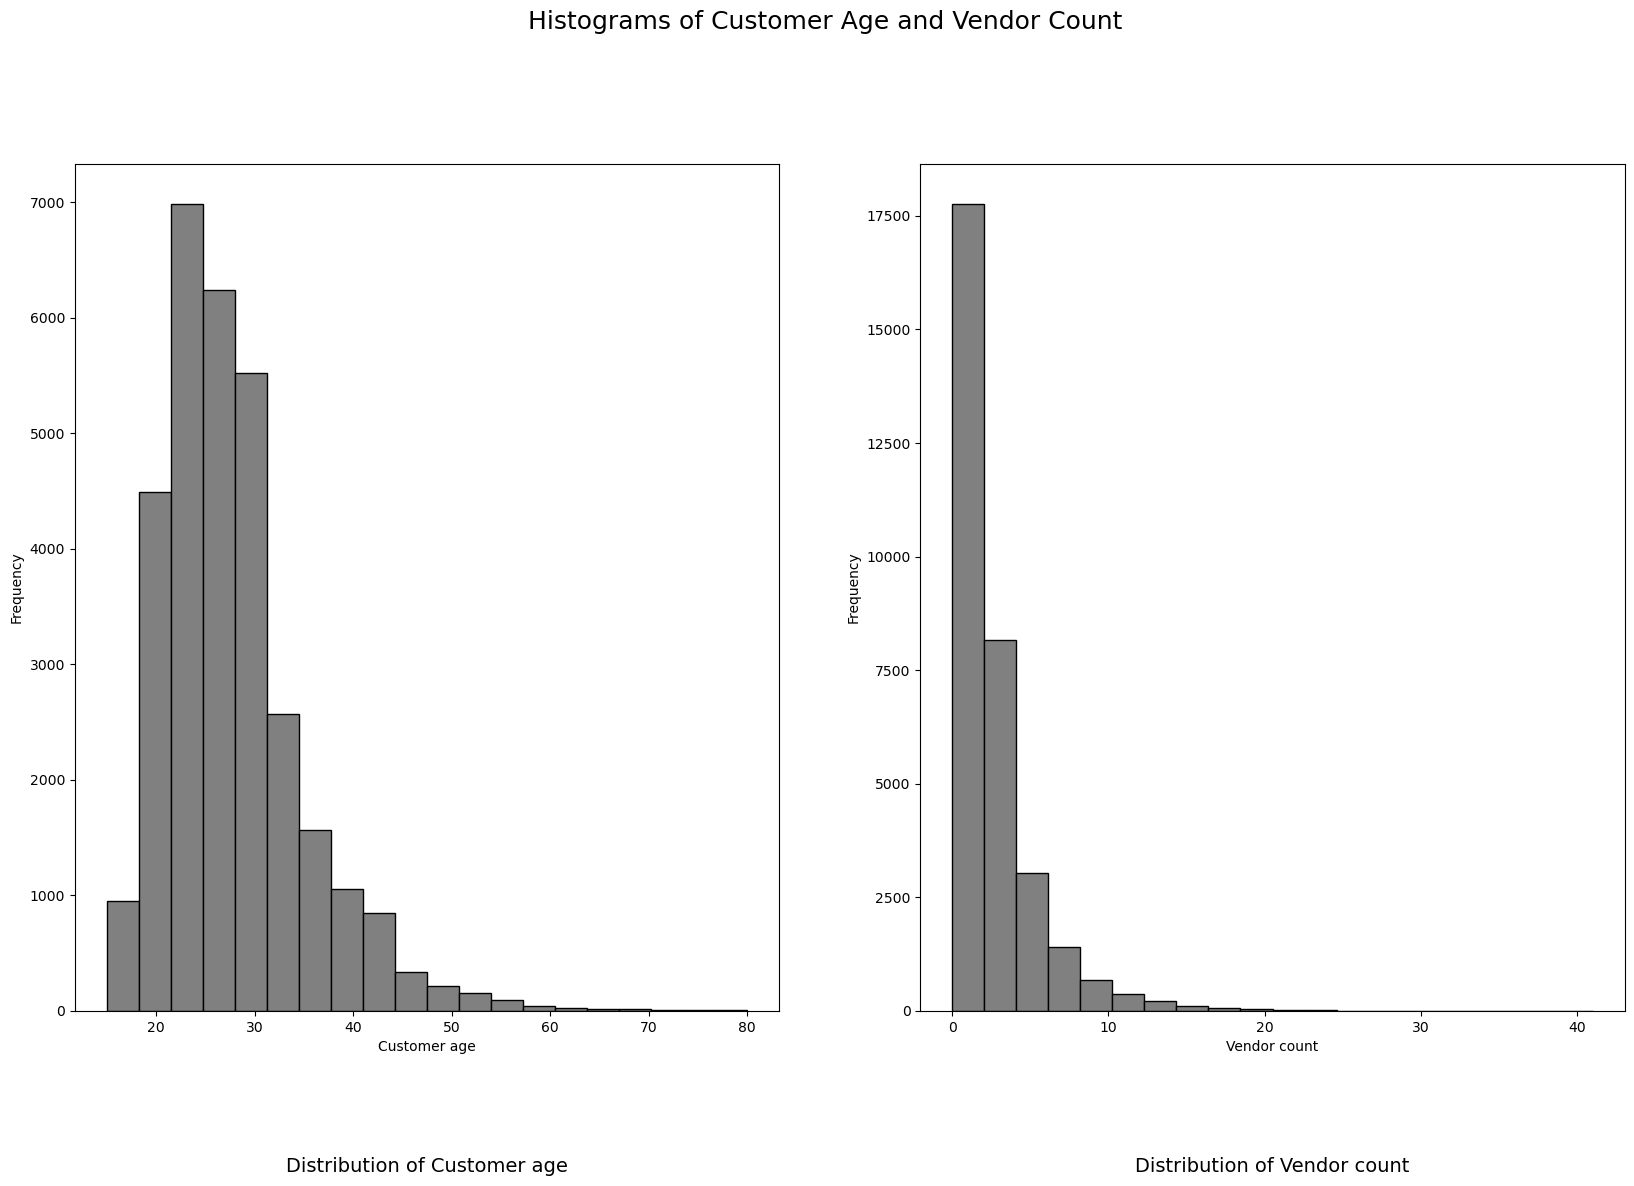

In [18]:
sp_rows = 1
sp_cols = 2

# Prepare figure and create individual axes for each histogram
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data for 'customer_age' and 'vendor_count'
# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    # Plot histogram in shades of grey for each feature
    ax.hist(df[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as PNG
plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

plt.show()

## Histograms: *first_order* and *last_order*

### Remark
- Majority of the customers have ordered products for the first time in the first days in the first month and for the last time in the last days in the last month.

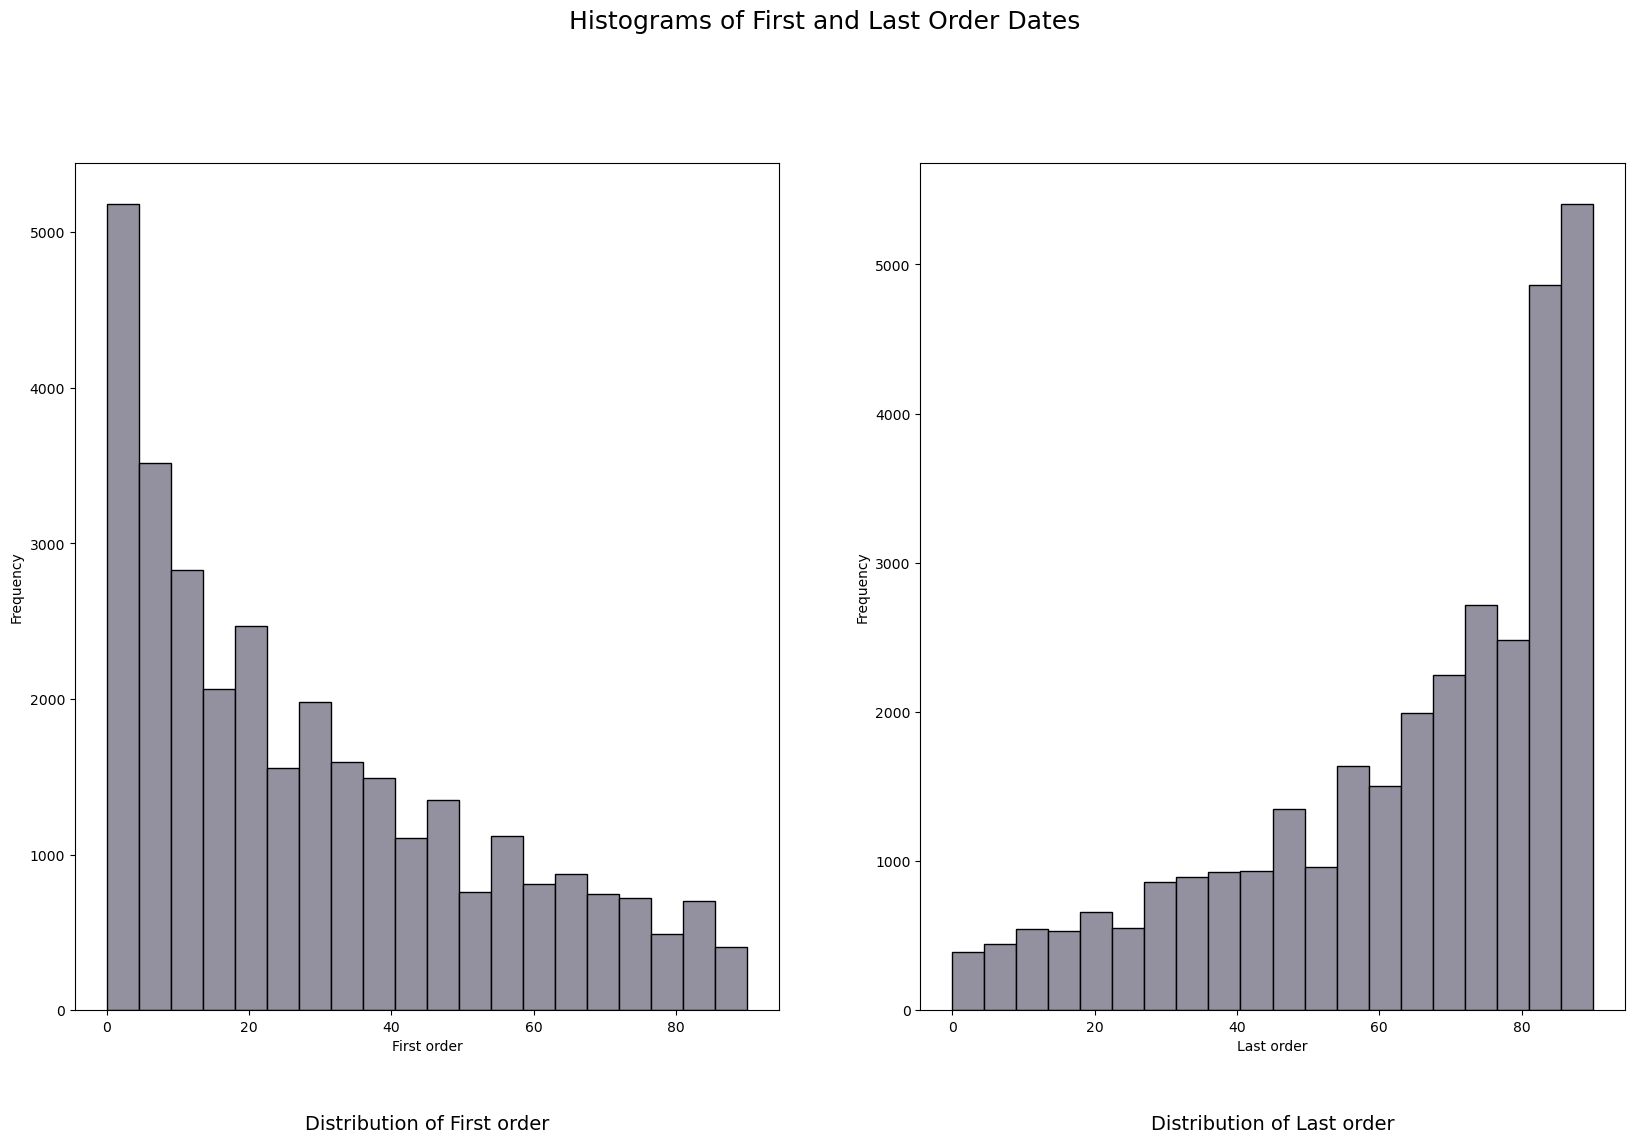

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(20, 11))  

# Plot histograms for 'first_order' and 'last_order'
for ax, feature in zip(axes.flatten(), ['first_order', 'last_order']):
    # Plot histogram with a grey color for both features
    ax.hist(df[feature].dropna(), bins=20, color='#9391A0', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.15)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Frequency")

plt.suptitle("Histograms of First and Last Order Dates", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as a high-quality PNG file
plt.savefig(os.path.join(save_dir, 'first_last_order_histograms.png'), dpi=200, bbox_inches='tight')

plt.show()

## Bar Chart: **Total Orders per Hour**

### Remarks
- It can be observed that high demand occurs from 10:00 to 12:00 and 16:00 to 18:00.

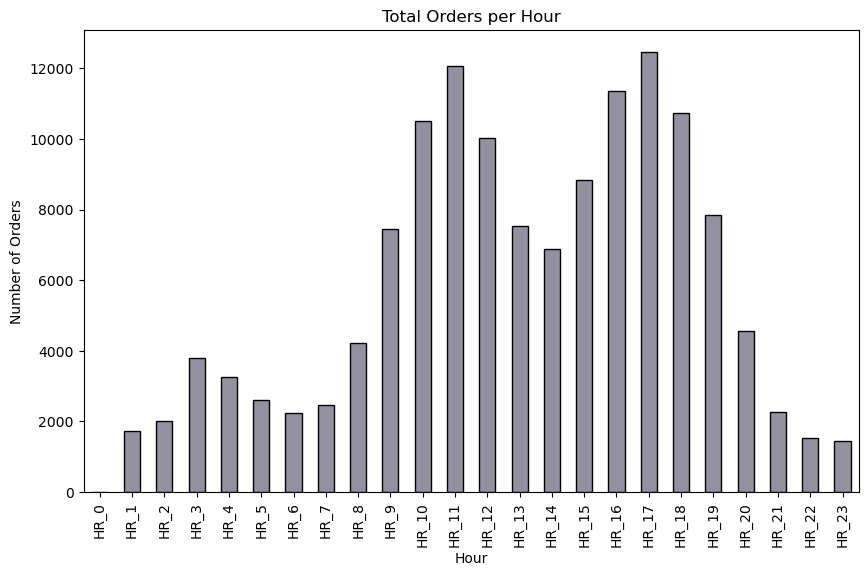

In [22]:
# Selecting columns related to each hour (HR_0 to HR_23)
hour_columns = [f'HR_{i}' for i in range(24)]

# Calculating total orders for each hour by summing across all rows for each hour column
total_orders_per_hour = df[hour_columns].sum()

# Creating a bar plot to visualize total orders per hour in shades of grey
plt.figure(figsize=(10, 6))
total_orders_per_hour.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders per Hour') 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## Bar Chart: **Total Orders per Day of the Week**

### Remarks
- There is a peak in food orders on Thursdays (DOW_4) and Saturdays (DOW_6).

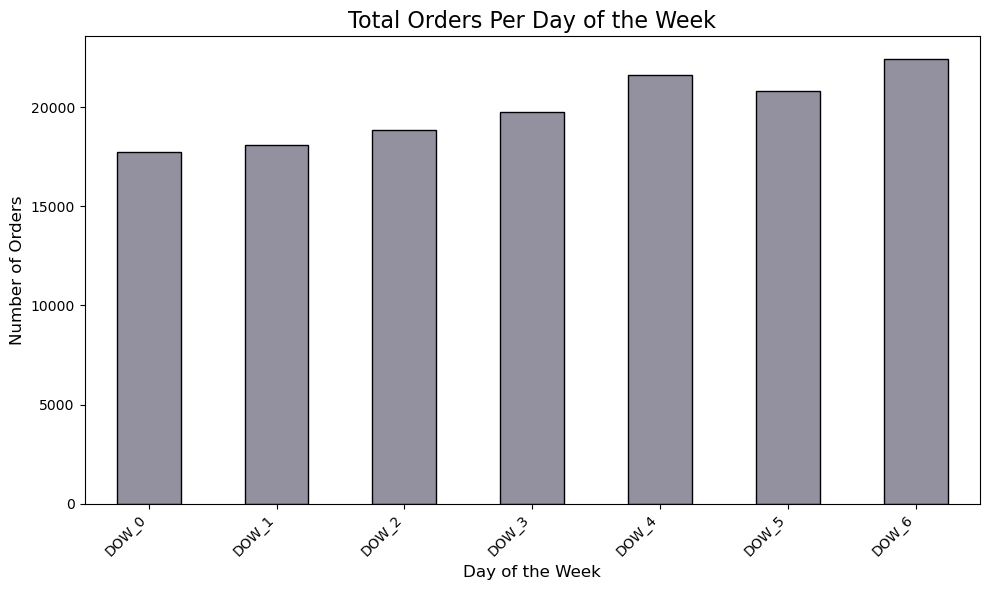

In [24]:
# Selecting columns for days of the week (DOW_0 to DOW_6)
dow_columns = [f'DOW_{i}' for i in range(7)]

# Calculating total orders for each day of the week by summing across all rows for each day column
total_orders_per_dow = df[dow_columns].sum()

# reating a bar chart to visualize total orders per day of the week in grey scale
plt.figure(figsize=(10, 6))
total_orders_per_dow.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Day of the Week', fontsize=16) 
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

## Bar chart: **Total Orders per Cuisine**

### Remarks
- Asian, American and Street food / snacks can be considered as the most popular choices.

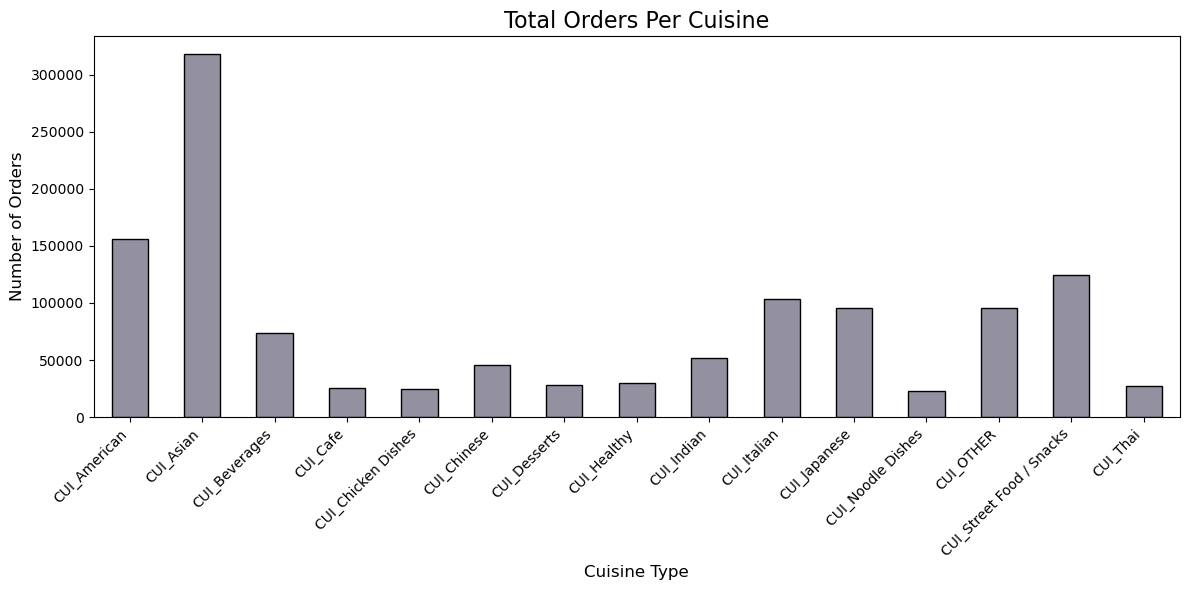

In [26]:
# Selecting columns related to cuisines (CUI_American, CUI_Asian, etc.)
cuisine_columns = [col for col in df.columns if 'CUI_' in col]

# Summing total number of orders per cuisine
df['total_orders_per_cuisine'] = df[cuisine_columns].sum(axis=1)

# Creating a bar chart to visualize total orders per cuisine in grey scale
plt.figure(figsize=(12, 6))
df[cuisine_columns].sum().plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Cuisine', fontsize=16) 
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## Bar charts: **Low and Medium Popular Cuisines Orders during All Hours**

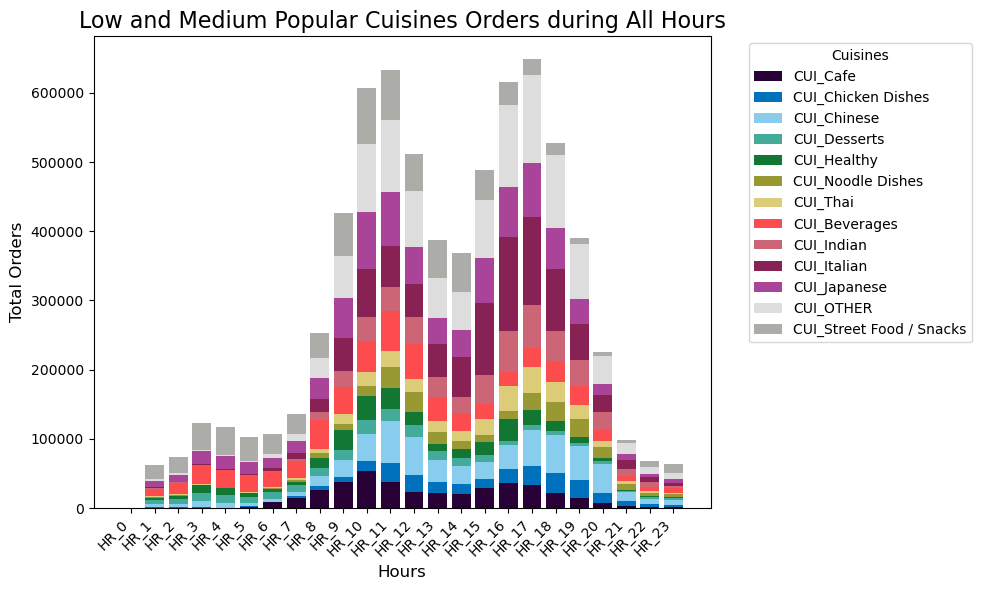

In [28]:
# Define the adjusted peak hours
hour_columns = [f'HR_{i}' for i in range(24)]

# Define popularity thresholds
low_threshold = 50000
medium_threshold = 150000

# Filter cuisines based on their order counts
cuisine_totals = df[cuisine_columns].sum()
low_popular_cuisines = cuisine_totals[cuisine_totals < low_threshold].index
medium_popular_cuisines = cuisine_totals[(cuisine_totals >= low_threshold) & (cuisine_totals < medium_threshold)].index

# Combine low and medium popular cuisines
filtered_cuisine_columns = low_popular_cuisines.append(medium_popular_cuisines)

# Initialize a DataFrame to store the total cuisine orders per hour (for low and medium cuisines)
cuisine_hour_data = pd.DataFrame(index=hour_columns, columns=filtered_cuisine_columns)

# Calculate the total orders for each cuisine in each hour (HR_9 to HR_19)
for hour in hour_columns:
    for cuisine in filtered_cuisine_columns:
        cuisine_hour_data.loc[hour, cuisine] = (df[hour] * df[cuisine]).sum()

# Convert the values to numeric
cuisine_hour_data = cuisine_hour_data.apply(pd.to_numeric)

# Define a distinct color palette for the cuisines
colors = ['#280137', '#0071bc', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#FC4C4E',
          '#CC6677', '#882255', '#AA4499', '#DDDDDD', '#ACADA8']  # Add more colors as needed

# If you have more cuisines than colors, you may need to repeat or extend the colors list
if len(filtered_cuisine_columns) > len(colors):
    colors = colors * (len(filtered_cuisine_columns) // len(colors) + 1)

# Plot a stacked bar chart for the low and medium popular cuisines
plt.figure(figsize=(10, 6))

# Create the stacked bars for each cuisine
bottom_values = np.zeros(len(hour_columns))  # Keeps track of the bottom of the stack
for i, cuisine in enumerate(filtered_cuisine_columns):
    plt.bar(hour_columns, cuisine_hour_data[cuisine], bottom=bottom_values, label=cuisine, color=colors[i])
    bottom_values += cuisine_hour_data[cuisine]  # Update the bottom to stack the next bar

plt.title('Low and Medium Popular Cuisines Orders during All Hours', fontsize = 16)
plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Total Orders', fontsize = 12)
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Bar Chart **Average Purchases per Order by Cuisine**

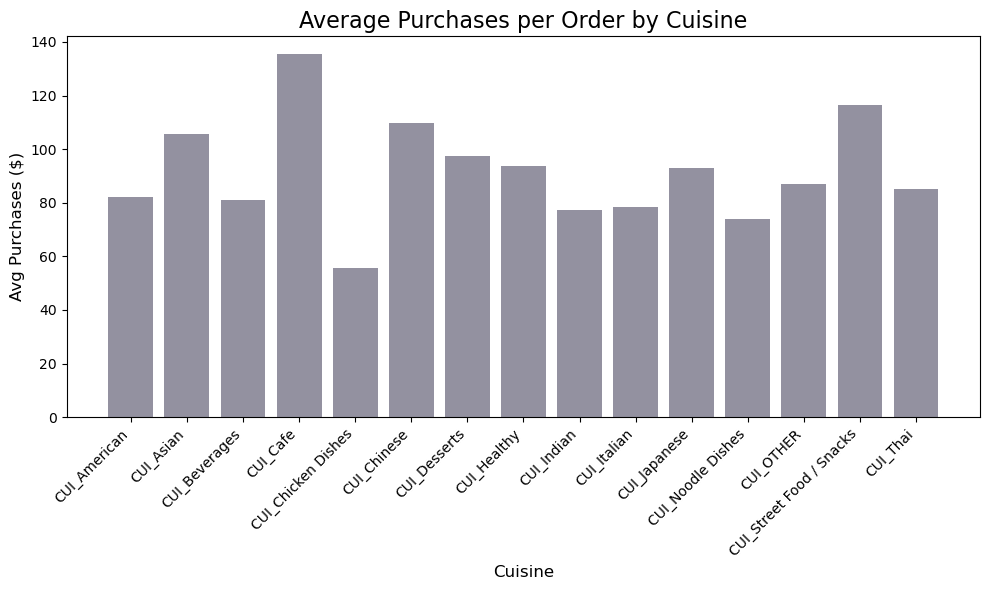

In [30]:
# Check if 'total_revenue' exists; if not, create it by summing across cuisine columns
if 'total_revenue' not in df.columns:
    df['total_revenue'] = df[cuisine_columns].sum(axis=1)  # Calculate total revenue for each row

# Calculate Avg_Purchases for each cuisine
# Multiply the number of purchases by total revenue, then sum and divide by total purchases for each cuisine
avg_purchases = (df[cuisine_columns].multiply(df['total_revenue'], axis=0)).sum() / df[cuisine_columns].sum()

# Plot Avg_Purchases as a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(cuisine_columns, avg_purchases, color="#9391A0")  # Use a grey color for the bars

plt.title('Average Purchases per Order by Cuisine', fontsize=16)  
plt.xlabel('Cuisine', fontsize=12)  
plt.ylabel('Avg Purchases ($)', fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

## Scatter plots

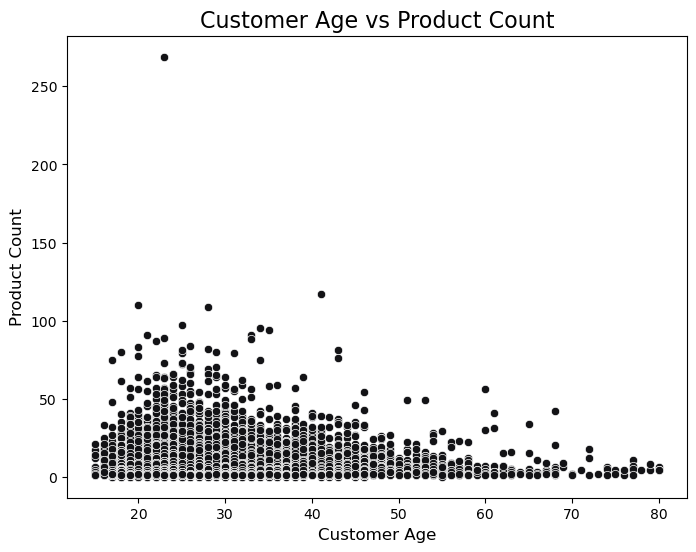

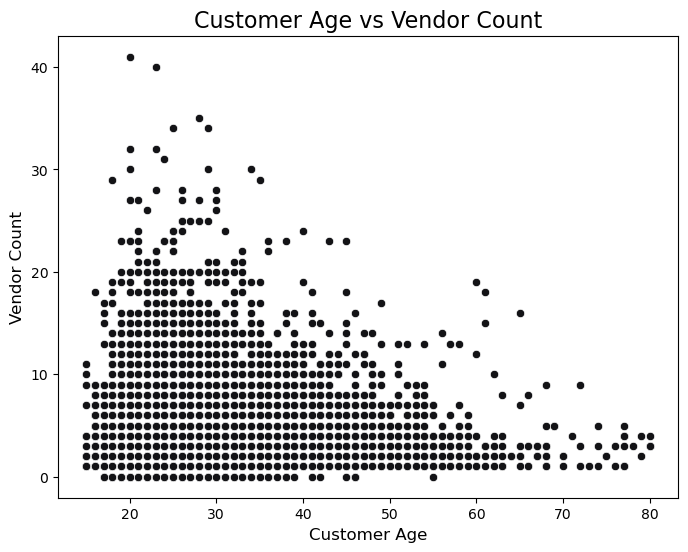

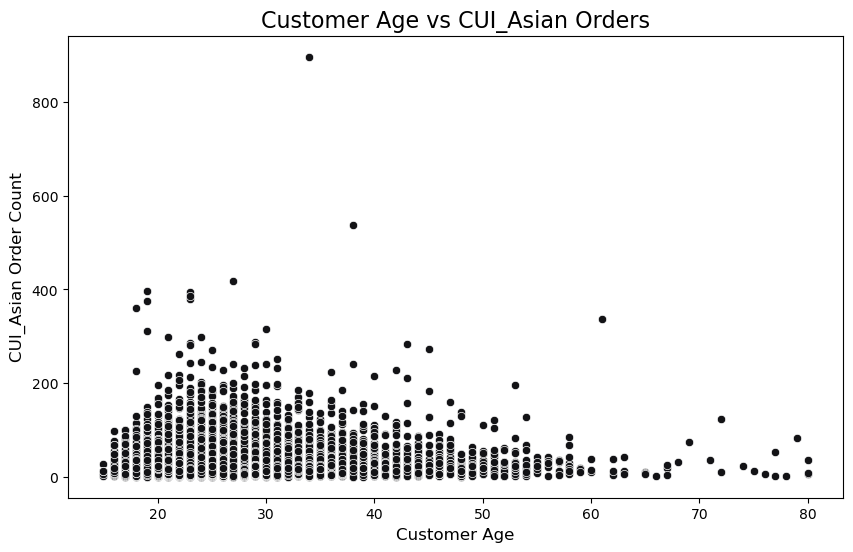

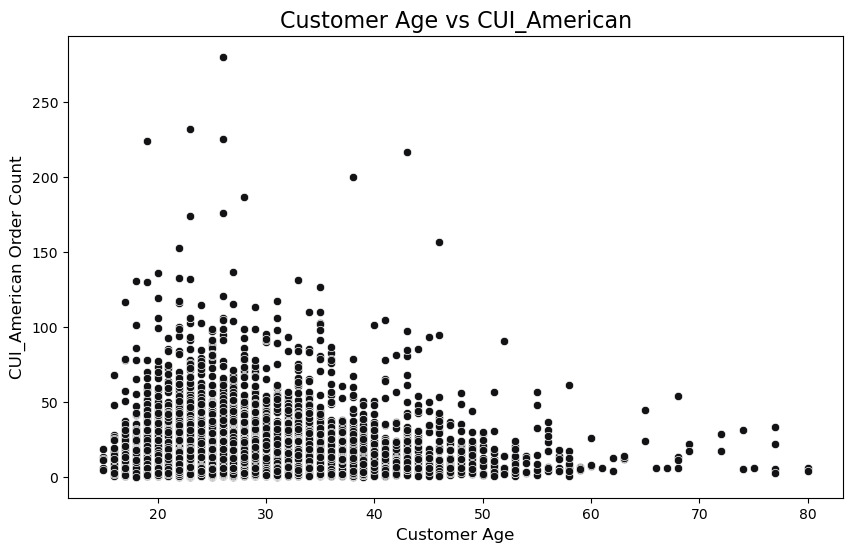

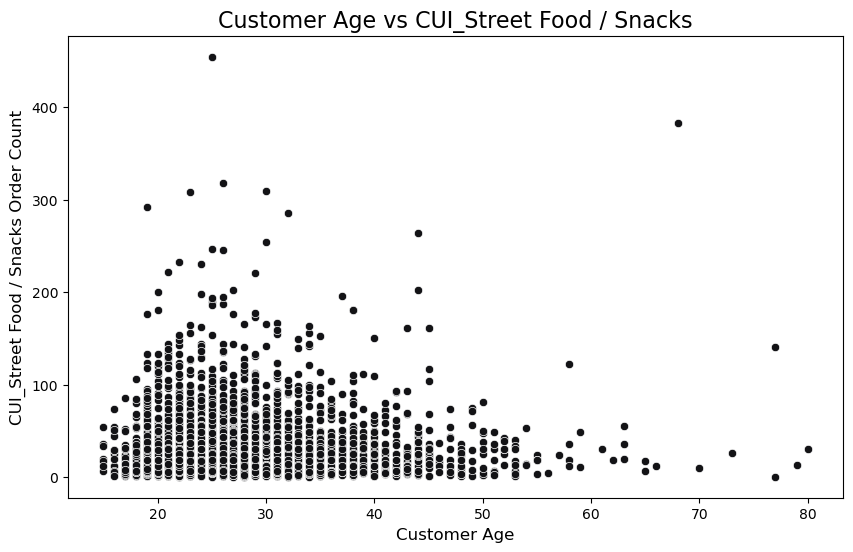

In [32]:
# Scatter plot: Customer Age vs Product Count
plt.figure(figsize=(8, 6))  
sns.scatterplot(data=df, x='customer_age', y='product_count', color="#131316")  
plt.title('Customer Age vs Product Count', fontsize=16)  
plt.xlabel('Customer Age', fontsize=12)  
plt.ylabel('Product Count', fontsize=12)  
plt.show()  

# Scatter plot: Customer Age vs Vendor Count
plt.figure(figsize=(8, 6))  
sns.scatterplot(data=df, x='customer_age', y='vendor_count', color="#131316")  
plt.title('Customer Age vs Vendor Count', fontsize=16)  
plt.xlabel('Customer Age', fontsize=12)  
plt.ylabel('Vendor Count', fontsize=12)  
plt.show()  

# Box plot: Customer Age vs Popular Cuisines (Low, Medium, High)
# Filter data for non-zero CUI_Asian counts
df_cui_asian = df[df['CUI_Asian'] > 0]  # Dataframe for Asian cuisine
df_cui_american = df[df['CUI_American'] > 0]  # Dataframe for American cuisine
df_cui_street = df[df['CUI_Street Food / Snacks'] > 0]  # Dataframe for Street Food cuisine

# Scatter plot of customer_age vs CUI_Asian
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=df_cui_asian, x='customer_age', y='CUI_Asian', color="#131316")  
plt.title('Customer Age vs CUI_Asian Orders', fontsize=16)  
plt.xlabel('Customer Age', fontsize=12)  
plt.ylabel('CUI_Asian Order Count', fontsize=12)  
plt.show()  

# Scatter plot of customer_age vs CUI_American
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df_cui_american, x='customer_age', y='CUI_American', color="#131316")  
plt.title('Customer Age vs CUI_American', fontsize=16)  
plt.xlabel('Customer Age', fontsize=12)  
plt.ylabel('CUI_American Order Count', fontsize=12)  
plt.show()  

# Scatter plot of customer_age vs CUI_Street Food / Snacks
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df_cui_street, x='customer_age', y='CUI_Street Food / Snacks', color="#131316")  
plt.title('Customer Age vs CUI_Street Food / Snacks', fontsize=16)  
plt.xlabel('Customer Age', fontsize=12)  
plt.ylabel('CUI_Street Food / Snacks Order Count', fontsize=12)  
plt.show()  

<a class="anchor" id="6">     

# 3. Key Statisctics and Trend
</a>    

## Remarks from first delivery

### Key Statistics
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, young people tend to use our food delivery services.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from one vendor, 50% have ordered from two vendors, and 75% have ordered from four vendors. Thus, most of the customers have ordered from less than four vendors in three months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered two products, 50% have ordered three products, and 75% have ordered seven products in three months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Chain Restaurant Number**: DISAGREE WITH METADATA. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: It is unclear whether these features will be useful in our analysis. It is still undecided, but it should be converted to a different presentation method if we use them.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Customer Region**: There are eight different regions. There should be three cities instead, so it seems like they are postal codes. Then we can categorize them into three groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.

### Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

<a class="anchor" id="7">     

# 4. Data Pre-Processing 1
</a>    

<a class="anchor" id="8">     

## 4.1. Treat Missing Values
</a>    

## Remarks from first delivery
[Missing values]
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-) --> <font color='red'>Exaggerated number of missing values</font>

In [38]:
df.shape

(31888, 58)

In [39]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [40]:
df[["customer_age", "first_order", "HR_0"]].var()

customer_age     51.278464
first_order     581.248008
HR_0              0.000000
dtype: float64

In [41]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [42]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

We have decided to fill missing values in the feature: 
- **'customer_age'**: with its median because the data is skewed.
- **'first_order'**: with its median because the data is skewed.
- **'HR_0'** with 0 because it is the only value it has.
- **'customer_region'** with 8000. From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8000" for now since we will merge it with "8670", "8370" and "8550".
- **'last_promo'**: with "Unknown" for now. We might frop the feature itself later.

In [44]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

# Fill missing values in HR_0 with 0
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", 8000)

# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [45]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

<a class="anchor" id="9">     

## 4.2. Change dtypes
</a>    

## Remarks
- **'customer_region'** should be int instead of obj.
- **'customer_age'** should be int instead of float.
- **'is_chain'** should be bool instead of int because we agreed with METADATA.
- **'first_order'** should be int instead of float.
- **'HR_0'** should be int instead of float.

In [48]:
df["customer_region"] = df["customer_region"].astype("int")

df["customer_age"] = df["customer_age"].astype("int")

df["first_order"] = df["first_order"].astype("int")

df["HR_0"] = df["HR_0"].astype("int")

We disagee with Metadata about *is_chain* feature. We decided to convert it into boolean. If the value = 0, that means False, True otherwise.

In [50]:
df["is_chain"].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80])

In [51]:
df["is_chain"] = df["is_chain"].astype("bool")

#Replace True with 1 and False with 0
df["is_chain"] = df["is_chain"].apply(lambda x: 1 if x else 0)

In [52]:
# Check dataset if all dtypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  int64  
 2   customer_age              31888 non-null  int64  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31888 non-null  int64  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<a class="anchor" id="10">     

## 4.3. Treat Duplicates
</a>    

In [54]:
# Check if there are duplicates in the dataset
df.duplicated().sum()

13

In [55]:
# Drop duplicates in the dataset
df.drop_duplicates(inplace=True)

In [56]:
# Check if all duplicates are dropped
df.duplicated().sum()

0

<a class="anchor" id="11">     

# 5. Outliers
</a>    

## Remarks
We have decided to each thresholds accoding to the boxplots visualization as follows:
- CUI_ features: 
    - CUI_American <= 150
    - CUI_Asian <= 300
    - CUI_Beverages <= 125
    - CUI_Cafe <= 125
    - CUI_Chicken Dishes <= 60
    - CUI_Chinese <= 150
    - CUI_Desserts <= 75
    - CUI_Healthy <= 80
    - CUI_Indian <= 110
    - CUI_Italian <= 160
    - CUI_Japanese <= 150
    - CUI_Noodle Dishes <= 75
    - CUI_OTHER <= 125
    - CUI_Street Food / Snacks <= 200
    - CUI_Thai <= 60
    
- HR_ features: We decided NOT TO remove the outliers in order to segment the customer regarding to the order time
- vendor_count feature: <= 30
- product_count feature: <= 100
- customer_age feature: We decided NOT TO remove the outliers in order to segment the customer regarding to the age

## Define metric and non-metric features

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31875 non-null  int64  
 2   customer_age              31875 non-null  int64  
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  int64  
 6   first_order               31875 non-null  int64  
 7   last_order                31875 non-null  int64  
 8   last_promo                31875 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Chicken

In [61]:
# Define the list of non-metric features
non_metric_features = [
    "customer_id", 
    "last_promo", 
    "payment_method"
]

# Extract metric features by excluding non-metric features from the DataFrame columns
metric_features = df.columns.drop(non_metric_features).to_list()

# Print the list of metric features
print(metric_features)

['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'total_orders_per_cuisine', 'total_revenue']


## Box Plots: CUI_ features for outliers

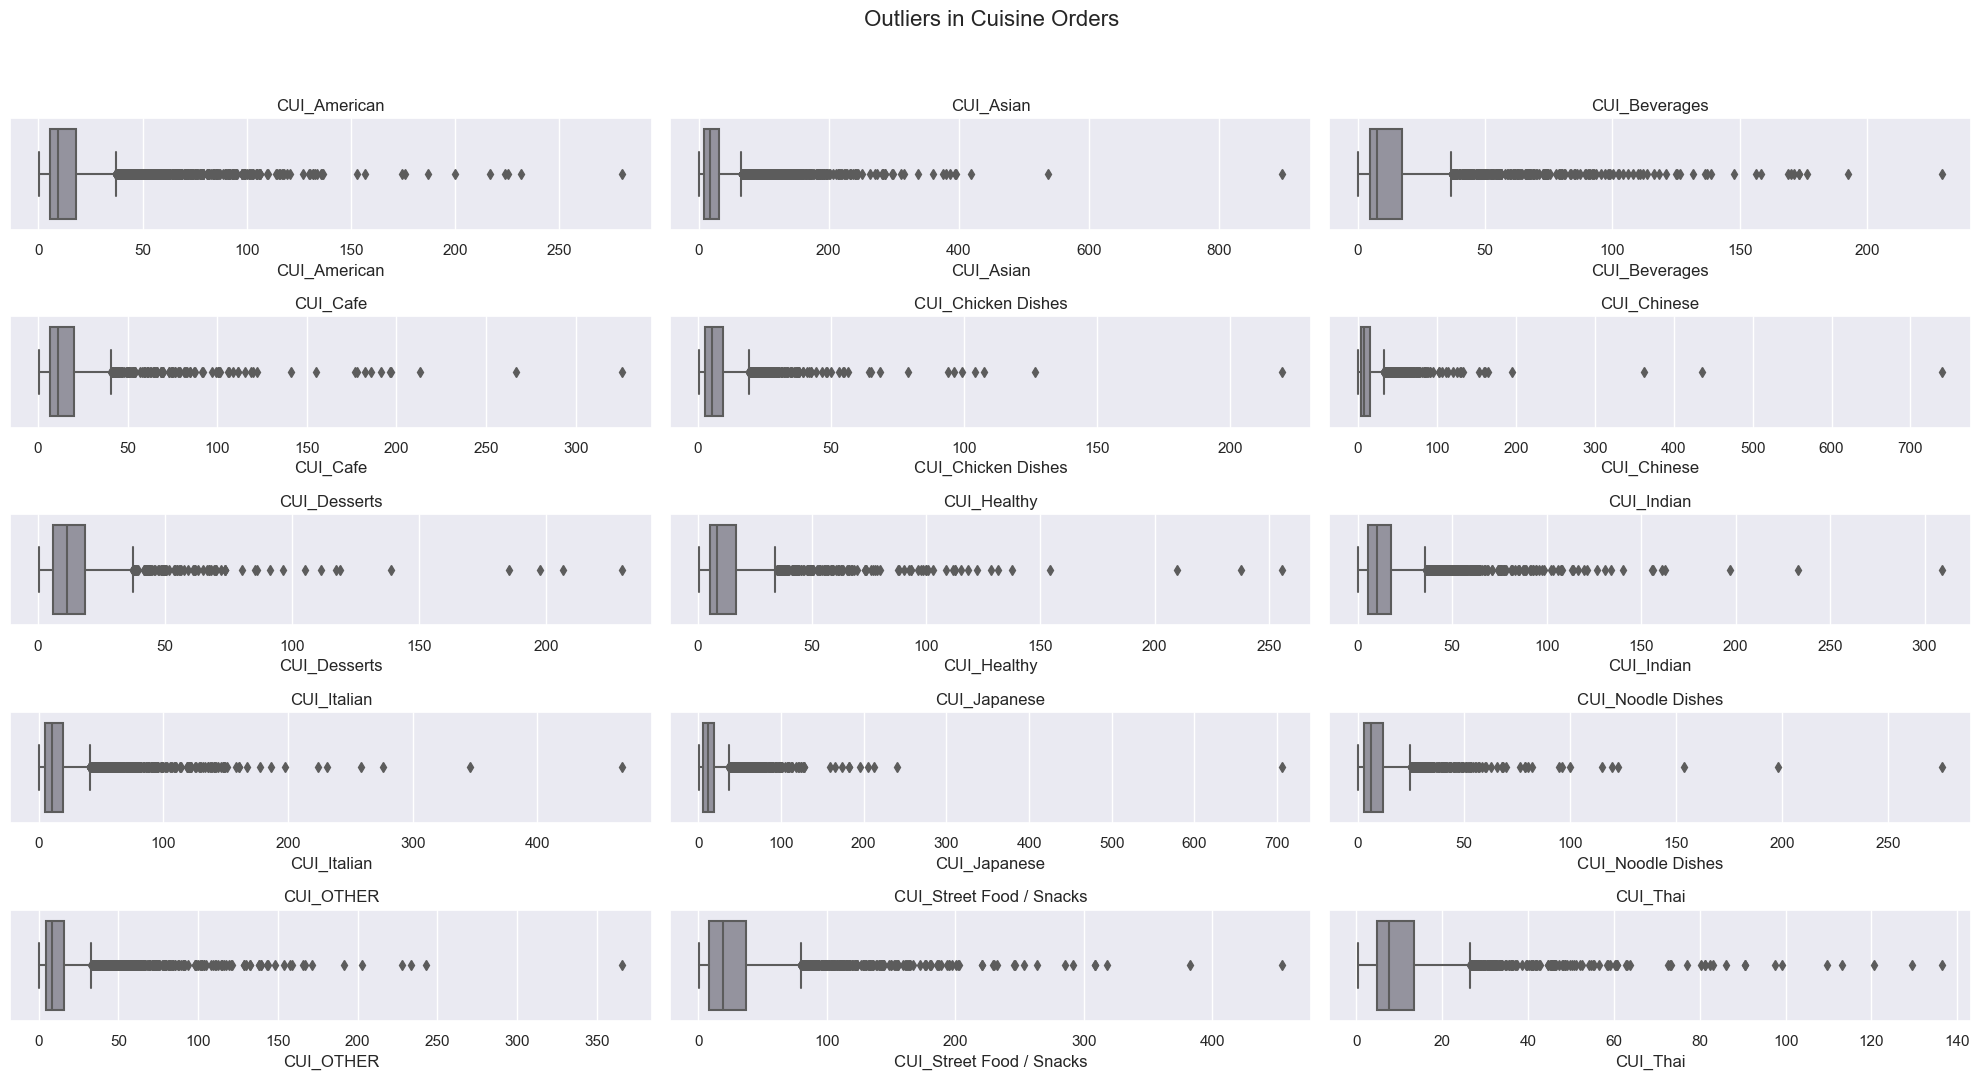

In [63]:
# List of features for which you want to plot boxplots
CUI_metric_features = [col for col in df.columns if 'CUI_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in CUI_metric_features if feat in df.columns]

# Set Seaborn style for better aesthetics
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)  # Calculate the number of columns needed

# Prepare figure and axes for subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D for easier iteration
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    # Filter out 0s from the feature
    # Replace 0s with NaN (ignoring them in boxplot)
    data = df[feat].replace(0, float('nan')) 
    
    # Plot the boxplot only for non-zero values
    sns.boxplot(x=data, ax=ax, color="#9391A0")
    ax.set_title(feat) 

# Remove any extra empty subplots if there are any
for ax in axes[len(valid_features):]:
    ax.remove()

title = "Outliers in Cuisine Orders"
plt.suptitle(title, fontsize=16) 
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


We decided to drop the ourliers manually in *CUI_* features according to the box plots above.

## Box plots: *HR_* features for outliers

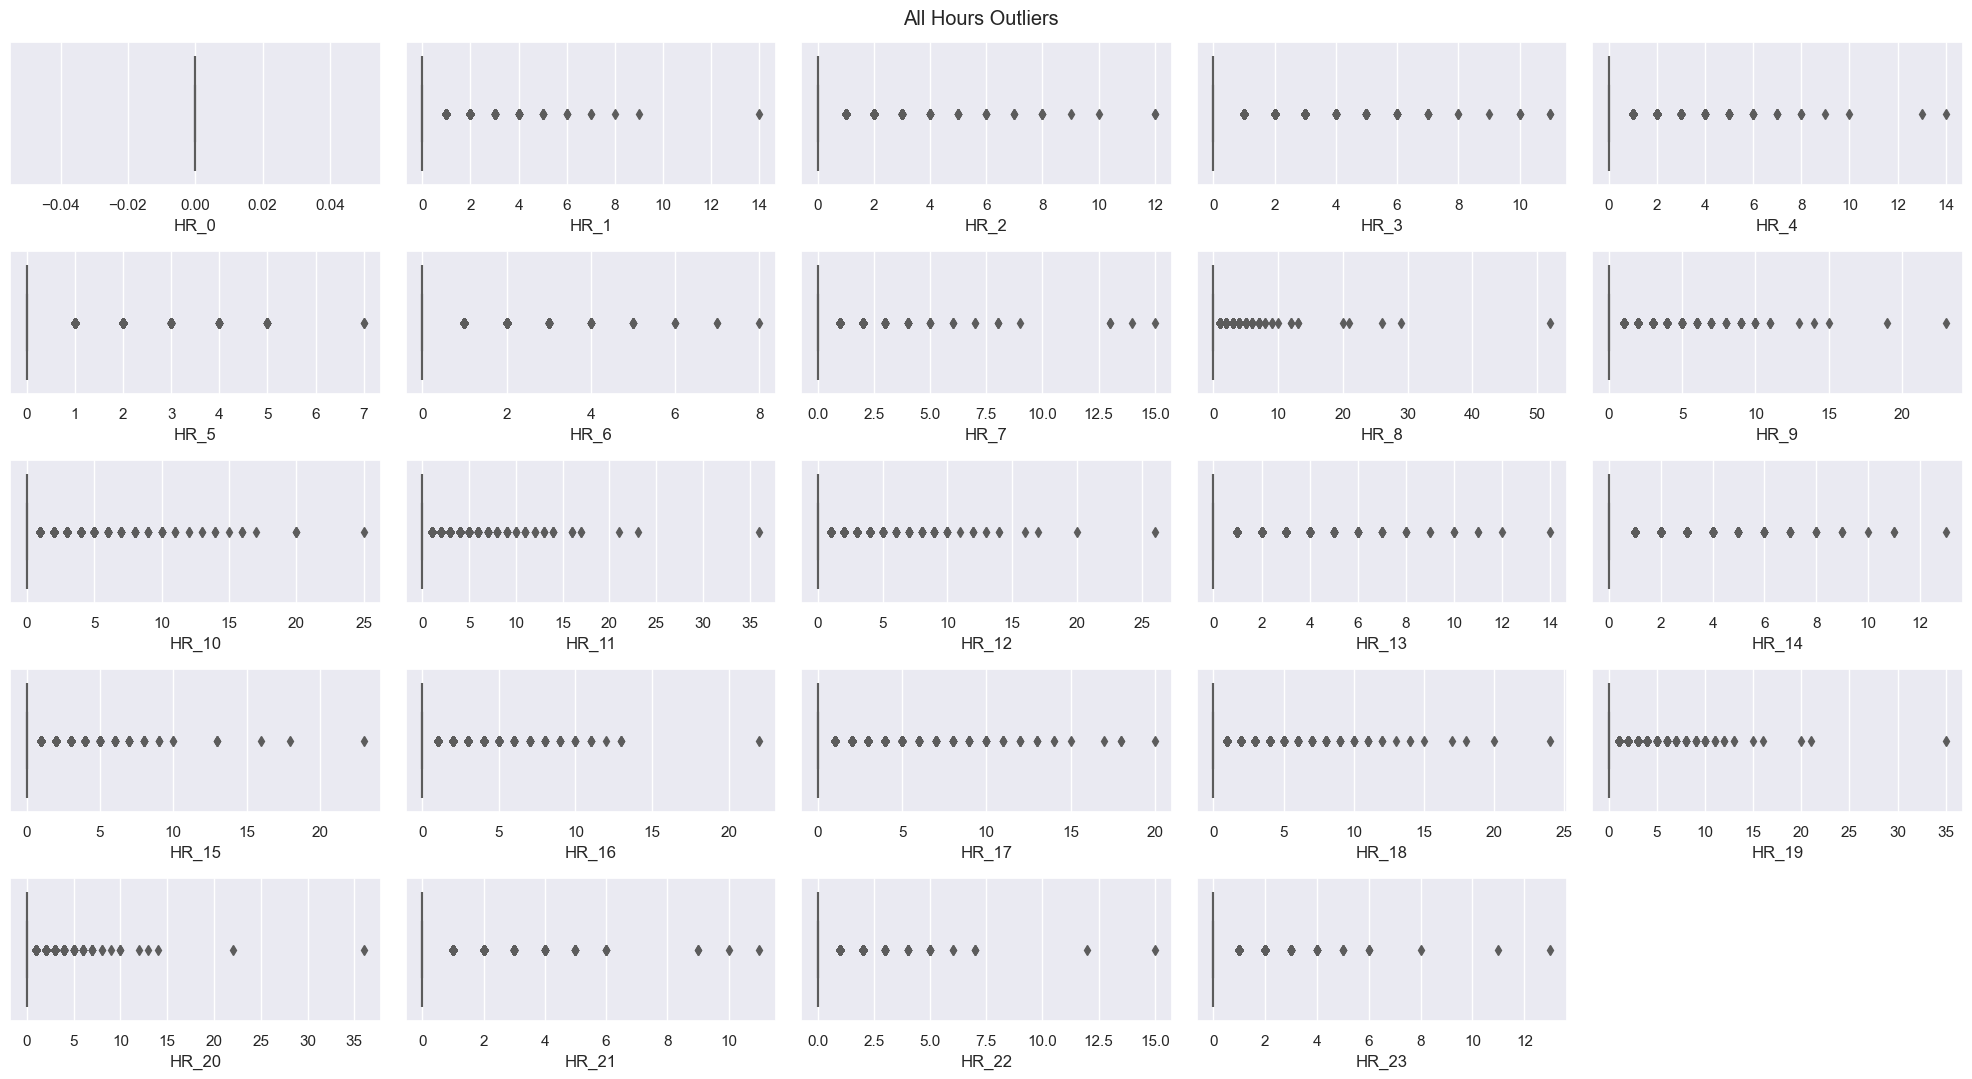

In [74]:
# List of features for which you want to plot boxplots
HR_metric_features = [col for col in df_filtered.columns if 'HR_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in HR_metric_features if feat in df_filtered.columns]

# Set Seaborn style
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)

# Prepare figure and axes
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    sns.boxplot(x=df[feat], ax=ax, color= "#9391A0")

# Remove any extra empty subplots
for ax in axes[len(valid_features):]:
    ax.remove()

# Layout adjustments
title = "All Hours Outliers"
plt.suptitle(title)
plt.tight_layout()
plt.show()

We decide not to remove the outliers in HR_ features in order to segment the customers regarding to the order time.

## Box plots: *vendor_count*, *product_count*, and *customer_age* for outliers

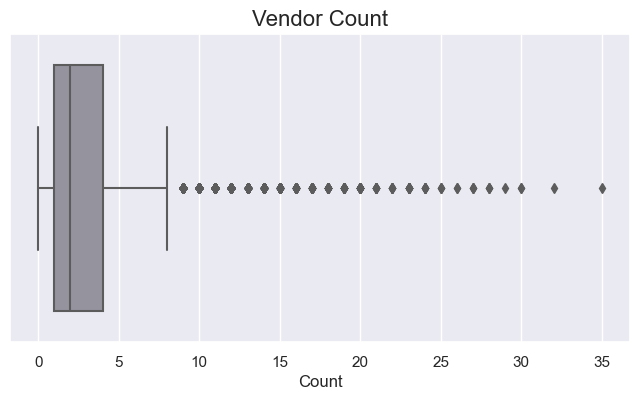

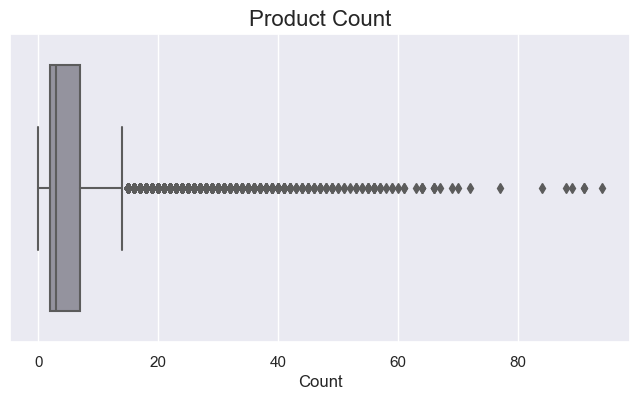

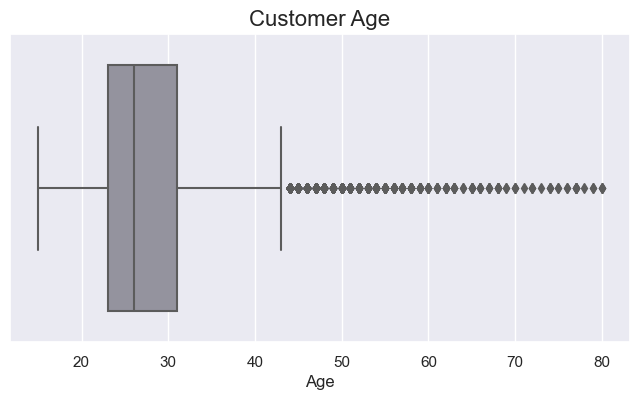

In [76]:
# Plot vendor_count
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['vendor_count'], orient='h', color="#9391A0")
plt.title('Vendor Count', fontsize=16)
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot product_count
plt.figure(figsize=(8, 4)) 
sns.boxplot(x=df_filtered['product_count'], orient='h', color="#9391A0") 
plt.title('Product Count', fontsize=16) 
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot customer_age
plt.figure(figsize=(8, 4))  
sns.boxplot(x=df_filtered['customer_age'], orient='h', color="#9391A0")  
plt.title('Customer Age', fontsize=16) 
plt.xlabel('Age', fontsize=12) 
plt.show()   

We decided to drop the outliers in *vendor_count* and *product_count* manually according to the box plots above.<br>
We decided not to drop the outliers in *customer_age* in order to segment the customer better.

In [82]:
# Remove the outliers from CUI_ features
filters = (
    (df['CUI_American'] <= 150) &
    (df['CUI_Asian'] <= 300) &
    (df['CUI_Beverages'] <= 125) &
    (df['CUI_Cafe'] <= 125) &
    (df['CUI_Chicken Dishes'] <= 60) &
    (df['CUI_Chinese'] <= 150) &
    (df['CUI_Desserts'] <= 75) &
    (df['CUI_Healthy'] <= 80) &
    (df['CUI_Indian'] <= 110) &
    (df['CUI_Italian'] <= 160) &
    (df['CUI_Japanese'] <= 150) &
    (df['CUI_Noodle Dishes'] <= 75) &
    (df['CUI_OTHER'] <= 125) &
    (df['CUI_Street Food / Snacks'] <= 200) &
    (df['CUI_Thai'] <= 60) &
    (df['vendor_count'] <= 30) &
    (df['product_count'] <= 100)
)

df_filtered = df[filters]

print('Percentage of data kept after removing outliers:', np.round(df_filtered.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9929


<a class="anchor" id="12">     

# 6. New Feature Creation
</a>

We have decided to create 6 new features as follows:

### 6.1. Regional Demographic
    [city_A; city_B; city_C]
There are currently eight distinct regions identified in the customer_region feature, though these appear to correspond to postal codes rather than broader geographic areas. By consolidating these into three new categorical features representing cities — City A (2360, 2440, 2490), City B (4660, 4140), and City C (8670, 8370, 8550) — we gain valuable segmentation potential. 
    This new structure allows for a more refined analysis of customer preferences by city, particularly in terms of cuisine choices. Grouping regions in this way can enhance our understanding of geographic trends in customer behavior, enabling us to apply targeted marketing strategies that align more closely with regional tastes and preferences. This feature engineering step provides a clearer, more actionable view of customer segments, supporting data-driven decision-making for regional market approaches.

### 6.2. Cuisine Popularity Rate
    [low_popularity; medium_popularity; high_popularity]
In our feature engineering efforts, we categorize cuisine types into three popularity levels — Low, Medium, and High — based on a defined order volume threshold. This segmentation enables targeted marketing strategies tailored to each cuisine's popularity. 
    For example, high-popularity cuisines can be promoted through broad campaigns to capture the attention of a larger audience, while low-popularity cuisines may benefit from niche marketing efforts aimed at specific customer segments. By aligning our marketing initiatives with the popularity of each cuisine type, we can enhance customer engagement, improve conversion rates, and ultimately drive business growth.

### 6.3. Age Segmentation
    [15-23; 24-26; 27-31; 32-80]
Age segmentation based on the provided key statistics summary reveals valuable insights into our customer demographics. With a minimum age of 15 years and a maximum of 80 years, our dataset captures a wide range of customers, highlighting diverse preferences and behaviors across different age groups.
    The quartile statistics further illustrate this diversity: 25% of our customers are 23 years or younger, indicating a substantial segment of younger consumers who may have distinct tastes and purchasing patterns. The median age of 26 years suggests that half of our customer base is relatively young, while the upper quartile at 31 years indicates a growing segment of slightly older customers. This age distribution underscores the importance of tailoring marketing strategies to resonate with varying age groups. 
    For example, younger consumers may be more influenced by trends and social media, while older customers might prioritize quality and brand reputation. By segmenting our marketing efforts according to these age demographics, we can create targeted campaigns that effectively address the unique preferences and needs of each age group, ultimately enhancing customer engagement and driving sales growth.

## 6.4. Peak Hours
    [morning_peak; afternoon_peak] 
By analyzing daily activity patterns, we observe that the majority of orders occur between 9 AM and 7 PM, identifying these as peak hours. This timeframe can be further divided into two segments: the morning peak (9 AM to 1 PM) and the afternoon peak (2 PM to 7 PM). Understanding customer preferences and behaviors during these distinct periods allows us to tailor our logistical and marketing strategies to better meet the demands of different cities throughout the day. This proactive approach enables us to optimize resource allocation, enhance customer satisfaction, and adapt our offerings to align with customer tendencies during peak ordering times.

## 6.5. Average Revenue per Order
    Total Revenue (Cuisine) / Total Orders (Cuisine)
Understanding how much revenue is generated per order can shed light on customer preferences and spending habits, allowing for targeted promotions and upselling opportunities. Also, it helps assess the profitability of each cuisine. A higher average revenue per order indicates that customers are willing to spend more on certain cuisines.

## 6.6. Customers Ordering Level
    [frequent_customers; moderate_customers, infrequent_customers]
Setting thresholds for order frequency enables effective segmentation of customer behavior into Low, Medium, and High ordering levels. This approach identifies frequent customers, allowing us to implement targeted marketing strategies to drive retention and loyalty among high-value segments.

In [ ]:
############### Do we need this code here? #############
# df['days_as_client'] = df['last_order'] - df['first_order']

<a class="anchor" id="13">     

## 6.1. Regional Demographic
</a>

Features: city a; city b; city c

<a class="anchor" id="14">     

## 6.2. Total orders
</a>

In [ ]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create the 'total_order' feature as the sum of the specified columns
df['total_orders'] = df[columns_to_sum].sum(axis=1)
# Display the updated DataFrame
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2


<a class="anchor" id="15">     

## 6.3. Average purchase 
</a>

In [ ]:
df['average_purchase'] = df['money_spent'] / df['total_orders']
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2,14.440000
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2,9.605000
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2,4.600000
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2,15.780000
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2,27.720000
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2,12.460000
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2,3.705000
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2,18.055000
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3,4.813333
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2,16.240000


In [ ]:
df['total_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59])

In [ ]:
# Define age categories
bins = [0, 18, 35, 60, float('inf')]  # Age ranges
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create new feature 'age_group'
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase,age_group
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2,14.440000,Young Adult
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2,9.605000,Child
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2,4.600000,Adult
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2,15.780000,Young Adult
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2,27.720000,Young Adult
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2,12.460000,Adult
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2,3.705000,Young Adult
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2,18.055000,Young Adult
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3,4.813333,Young Adult
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2,16.240000,Young Adult


In [ ]:
# Define periods of the day
morning_columns = ['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11']
afternoon_columns = ['HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17']
evening_columns = ['HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
night_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']

# Create new features by summing the orders in each period
df['morning_orders'] = df[morning_columns].sum(axis=1)
df['afternoon_orders'] = df[afternoon_columns].sum(axis=1)
df['evening_orders'] = df[evening_columns].sum(axis=1)
df['night_orders'] = df[night_columns].sum(axis=1)
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2,14.440000,Young Adult,0,0,2,0
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2,9.605000,Child,2,0,0,0
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2,4.600000,Adult,2,0,0,0
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2,15.780000,Young Adult,1,1,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2,27.720000,Young Adult,2,0,0,0
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2,12.460000,Adult,0,0,0,2
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2,3.705000,Young Adult,1,1,0,0
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2,18.055000,Young Adult,1,1,0,0
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3,4.813333,Young Adult,0,1,2,0
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2,16.240000,Young Adult,0,0,0,2


<a class="anchor" id="16">     

## 6.4. Customer ordering level
</a>

=<2 -> Infrequent
2< orders <=5 -> Moderate
<5 -> Frequent

In [ ]:
# Calculate the percentiles
q1 = df['total_orders'].quantile(0.25)
q3 = df['total_orders'].quantile(0.75)

# Define thresholds based on percentiles
df['customer_type'] = pd.cut(df['total_orders'], 
                             bins=[-float('inf'), q1, q3, float('inf')], 
                             labels=['Infrequent', 'Moderate', 'Frequent'])
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2,14.440000,Young Adult,0,0,2,0,Infrequent
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2,9.605000,Child,2,0,0,0,Infrequent
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2,4.600000,Adult,2,0,0,0,Infrequent
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2,15.780000,Young Adult,1,1,0,0,Infrequent
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2,27.720000,Young Adult,2,0,0,0,Infrequent
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2,12.460000,Adult,0,0,0,2,Infrequent
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2,3.705000,Young Adult,1,1,0,0,Infrequent
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2,18.055000,Young Adult,1,1,0,0,Infrequent
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3,4.813333,Young Adult,0,1,2,0,Moderate
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2,16.240000,Young Adult,0,0,0,2,Infrequent


In [ ]:
df.shape

(31875, 66)

In [ ]:
df['customer_type'].value_counts()

customer_type
Infrequent    14260
Moderate      10477
Frequent       7138
Name: count, dtype: int64

In [ ]:
Infrequent_counts = df[df['customer_type'] == 'Infrequent']['total_orders'].value_counts()
print(Infrequent_counts)

total_orders
2    7214
1    6908
0     138
Name: count, dtype: int64


In [ ]:
clients_with_zero_orders = df[df['total_orders'] == 0]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type
1449,4903041977,8670,22,0,0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
1476,c94b288475,8670,26,0,0,0,1,1,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
1488,f687717dc1,8670,21,0,0,1,1,1,DELIVERY,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
2486,c6cf0b76fb,8670,38,0,0,0,2,2,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Adult,0,0,0,0,Infrequent
3391,1b7c34738e,8670,24,0,0,0,3,3,UNKNOWN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
3405,5ccdf6c889,8670,25,0,0,0,3,3,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
6201,eff3f98046,8670,32,0,0,0,6,6,UNKNOWN,DIGI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
7123,376f896388,8670,29,0,0,1,7,7,DELIVERY,CARD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent
7152,8a7b681c19,8670,17,0,0,1,7,7,UNKNOWN,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Child,0,0,0,0,Infrequent
7166,a2b54d0827,8670,24,0,0,1,7,7,DELIVERY,CASH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,NaN,Young Adult,0,0,0,0,Infrequent


In [ ]:
df.drop(df[df['total_orders'] == 0].index, inplace=True)

In [ ]:
df.shape

(31737, 66)

In [ ]:
Moderate_counts = df[df['customer_type'] == 'Moderate']['total_orders'].value_counts()
print(Moderate_counts)

total_orders
3    5097
4    3168
5    2212
Name: count, dtype: int64


In [ ]:
frequent_counts = df[df['customer_type'] == 'Frequent']['total_orders'].value_counts()

total_orders
6     1492
7     1142
8      829
9      648
10     498
11     412
12     313
13     258
14     234
15     189
16     154
17     124
19      99
18      99
20      84
21      68
22      64
23      49
24      45
25      40
26      36
27      30
30      24
28      20
31      18
29      16
32      16
36      12
33      12
35       9
37       9
34       8
43       7
47       7
42       7
41       7
39       6
54       5
44       4
60       3
53       3
51       3
38       3
62       2
50       2
40       2
61       2
63       2
82       2
52       2
58       2
69       2
46       1
91       1
80       1
48       1
49       1
75       1
65       1
45       1
94       1
57       1
55       1
90       1
70       1
59       1
Name: count, dtype: int64


In [ ]:
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 2.0
75th Percentile (Q3): 5.0


<a class="anchor" id="17">     

## 6.5. Customer Preference
</a>


In [ ]:
# Identify the column with the labeled value for each customer
# Define all cuisine columns explicitly
cuisine_columns = [
    "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
]

# Apply idxmax only to the cuisine columns
df['Customer Preference'] = df[cuisine_columns].apply(lambda row: row.idxmax(), axis=1)
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,money_spent,days_as_client,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type,Customer Preference
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,28.88,1,2,14.440000,Young Adult,0,0,2,0,Infrequent,CUI_Indian
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19.21,1,2,9.605000,Child,2,0,0,0,Infrequent,CUI_American
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,9.20,1,2,4.600000,Adult,2,0,0,0,Infrequent,CUI_American
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,31.56,2,2,15.780000,Young Adult,1,1,0,0,Infrequent,CUI_Indian
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55.44,2,2,27.720000,Young Adult,2,0,0,0,Infrequent,CUI_Asian
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.92,2,2,12.460000,Adult,0,0,0,2,Infrequent,CUI_Asian
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,7.41,2,2,3.705000,Young Adult,1,1,0,0,Infrequent,CUI_American
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36.11,2,2,18.055000,Young Adult,1,1,0,0,Infrequent,CUI_Beverages
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,14.44,3,3,4.813333,Young Adult,0,1,2,0,Moderate,CUI_OTHER
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32.48,3,2,16.240000,Young Adult,0,0,0,2,Infrequent,CUI_Asian


<a class="anchor" id="18">     

# 7. Data Pre-Processing 2
</a>    

<a class="anchor" id="19">     

# 8. Feature Selection
</a>    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


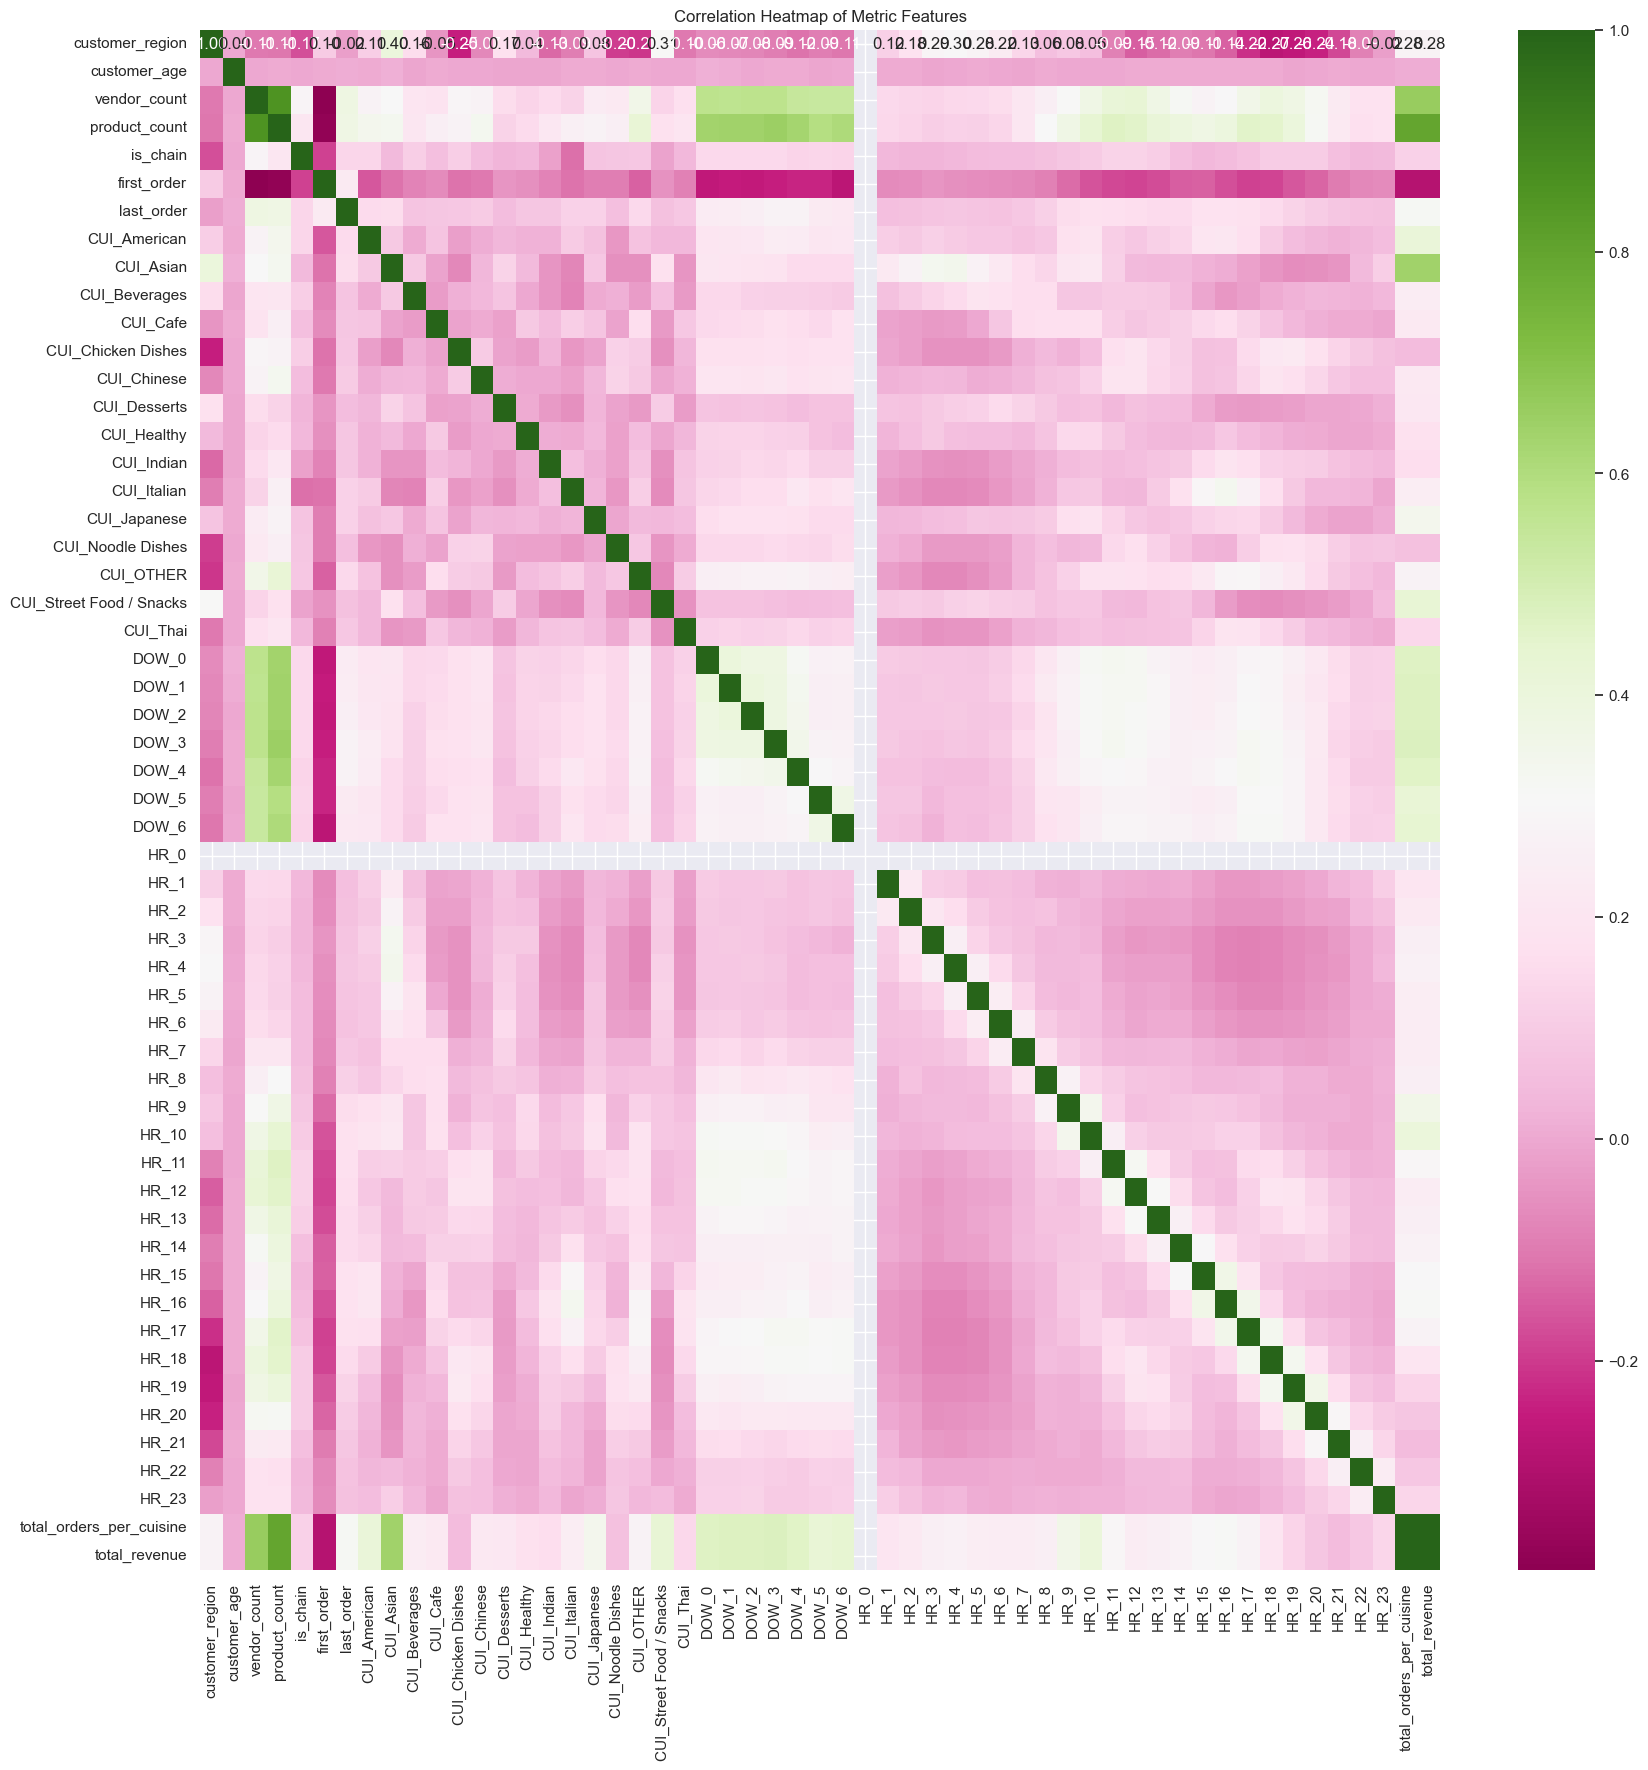

In [88]:
# Turn metric features into df to make a heatmap
metric_features_df = df_filtered[metric_features]

correlation_matrix = metric_features_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".2f")
plt.title("Correlation Heatmap of Metric Features")
plt.show()

In [90]:
#See features with less than 0.01 variance
metric_features_df.var()[metric_features_df.var() < 0.01]

HR_0    0.0
dtype: float64

High correlated features:
- product_count & vendor_count (0.9)
- product_count & total_orders_per_cuisine (0.8)
- product_count & total_revenue (0.8)
- product_count & money_spent (0.8)
- first_order & days_as_client (-0.8)
- total_orders_per_cuisine & total_revenue (1)
- total_orders_per_cuisine & money_spent (1)
- total_revenue & money_spent (1)
- city_a & customer_region (-1)
- city_c & customer_region (0.8)

## Remove features from metric_features: *product_count* and *customer_region*

In [94]:
# Notebook says "you can also drop the features from the df"
# But sometimes they may be useful for cluster profiling later

## RUN THIS CELL ONLY ONCE!!!!
metric_features.remove("product_count")
metric_features.remove("customer_region")

metric_features

['customer_age',
 'vendor_count',
 'is_chain',
 'first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'total_orders_per_cuisine',
 'total_revenue']

## Redo data exploration

### Re-check Missing Values

In [98]:
# Turn non metric features into df 
non_metric_features_df = df[non_metric_features]

In [100]:
non_metric_features_df.isna().sum()

customer_id       0
last_promo        0
payment_method    0
dtype: int64

In [102]:
metric_features_df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2                        0
HR_3                        0
HR_4      

### Re-check outliers

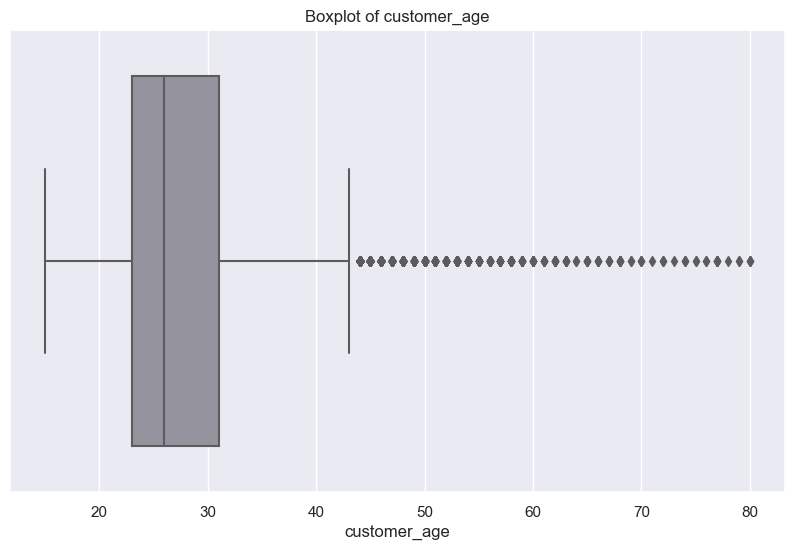

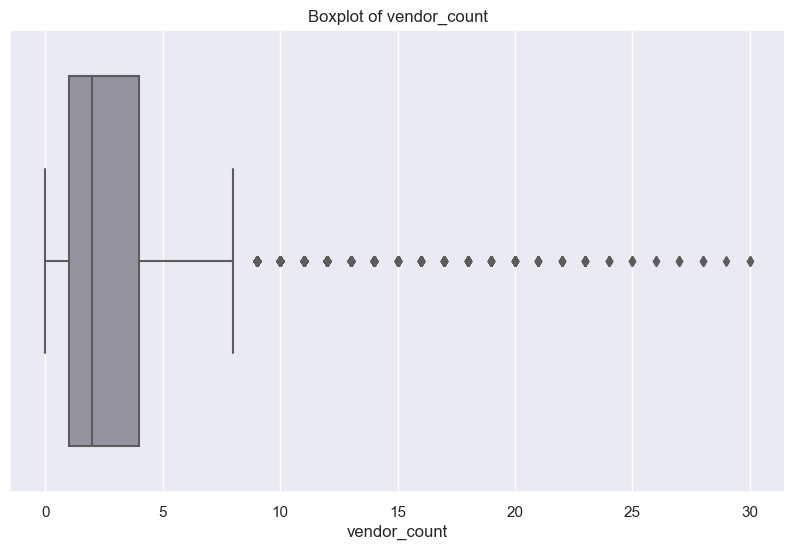

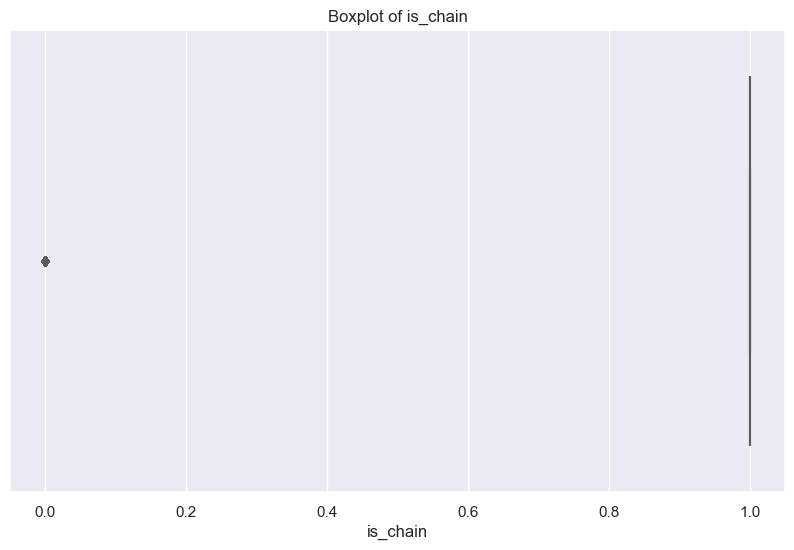

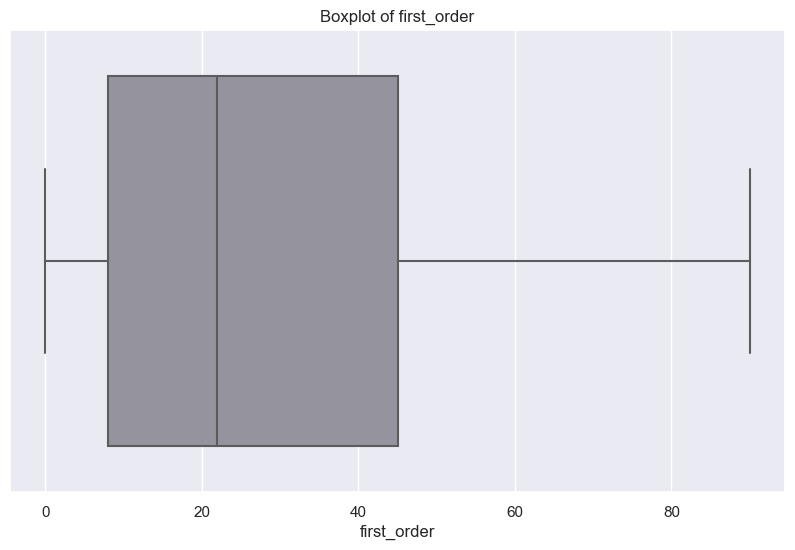

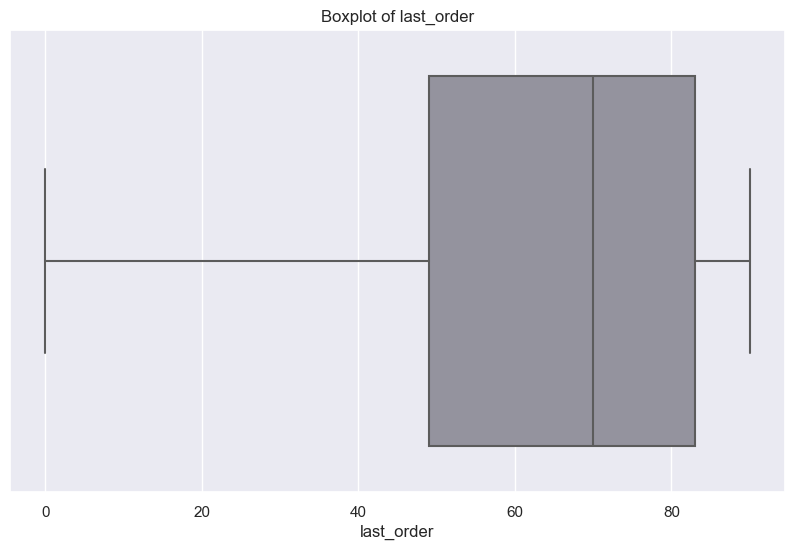

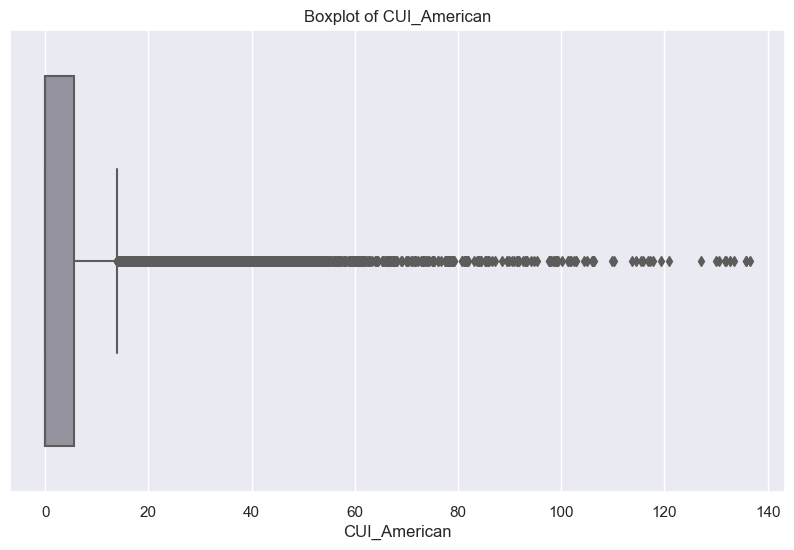

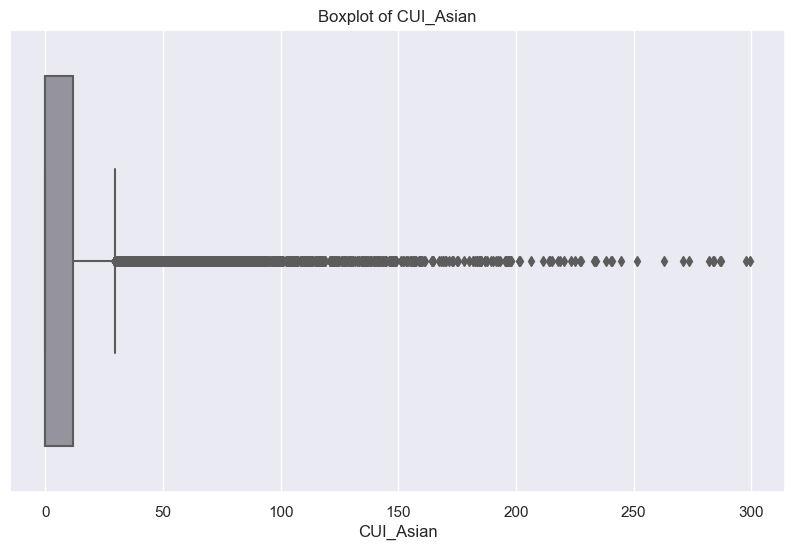

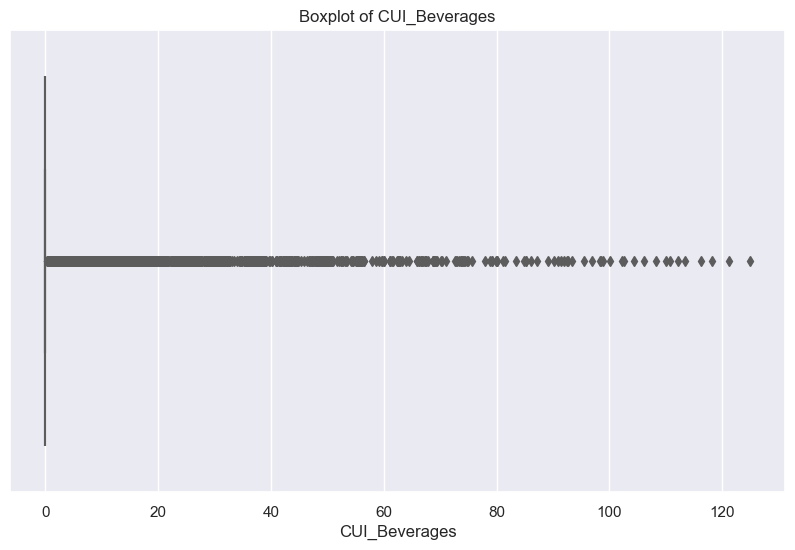

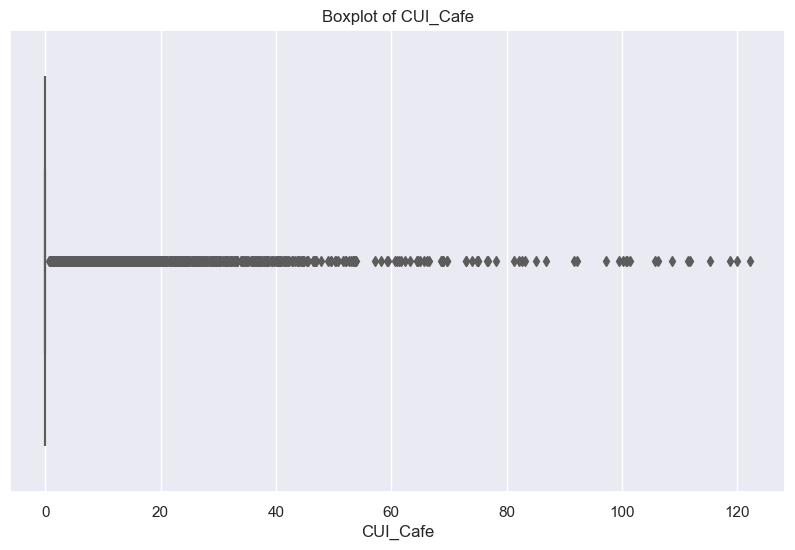

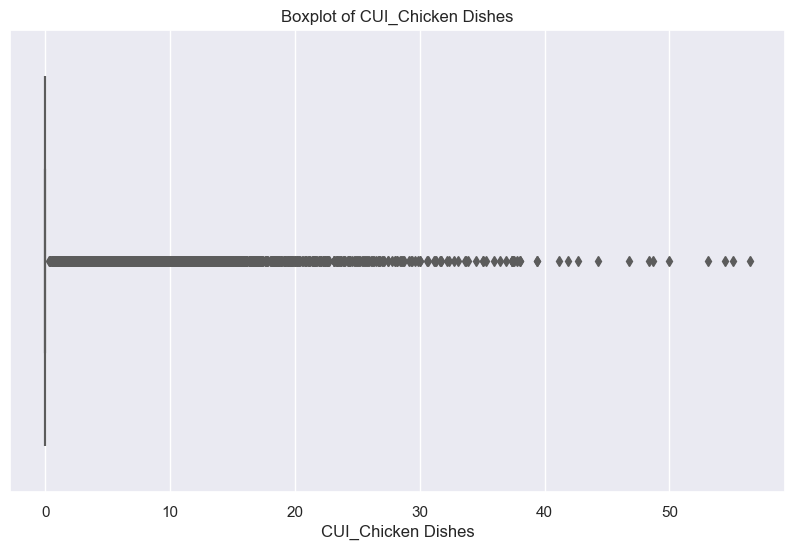

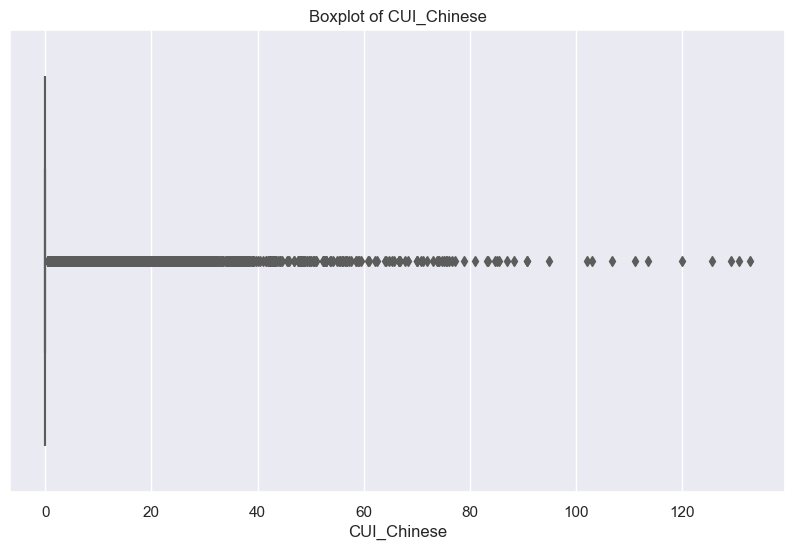

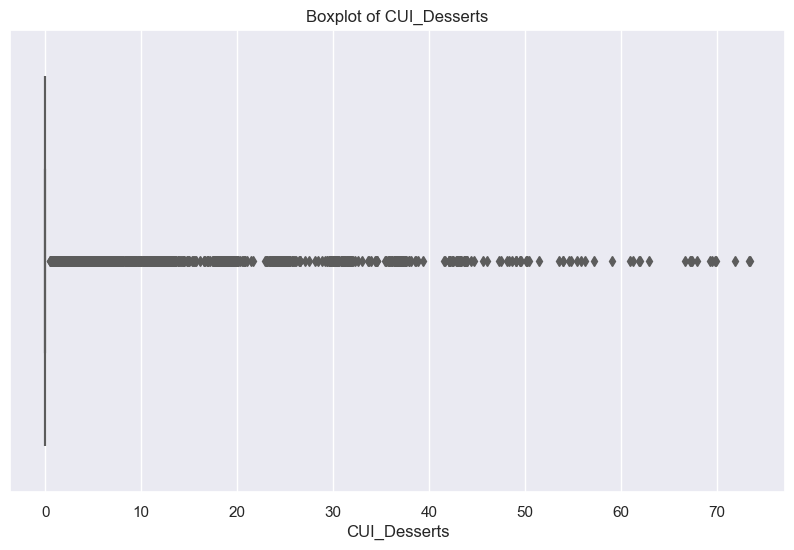

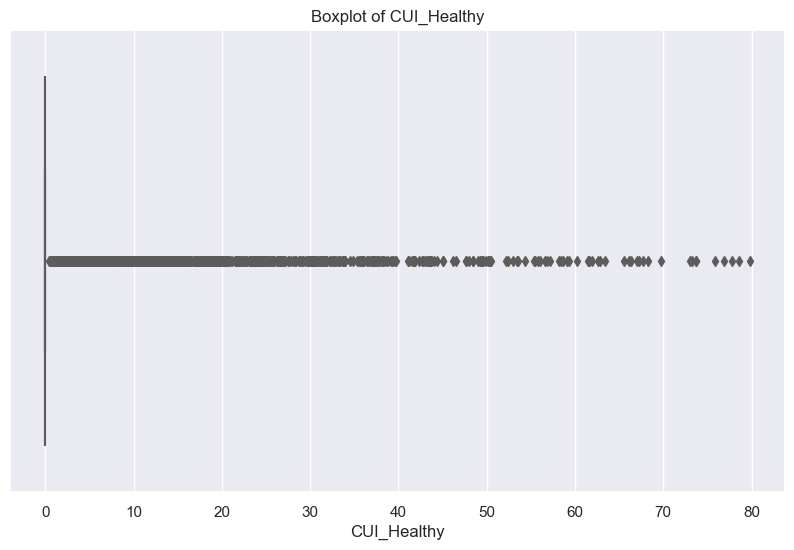

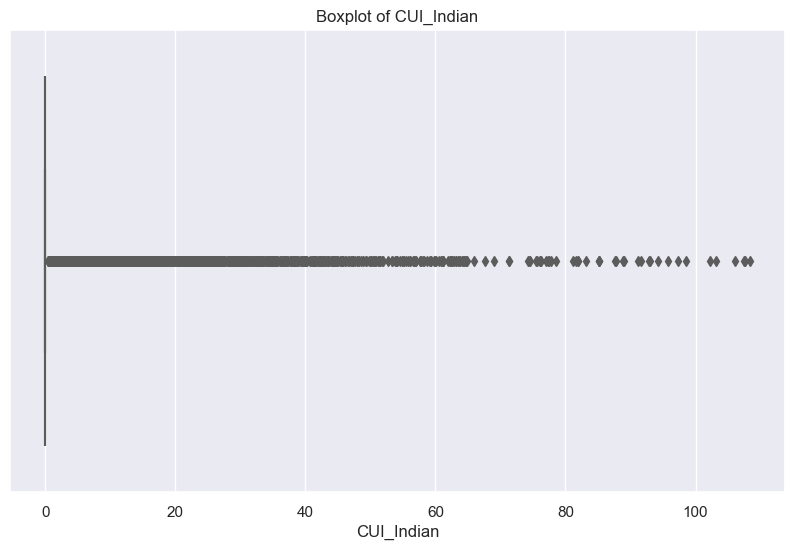

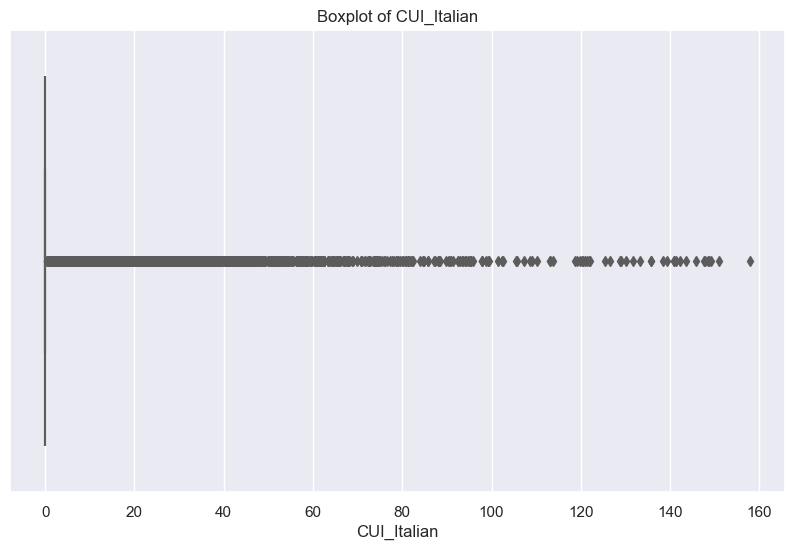

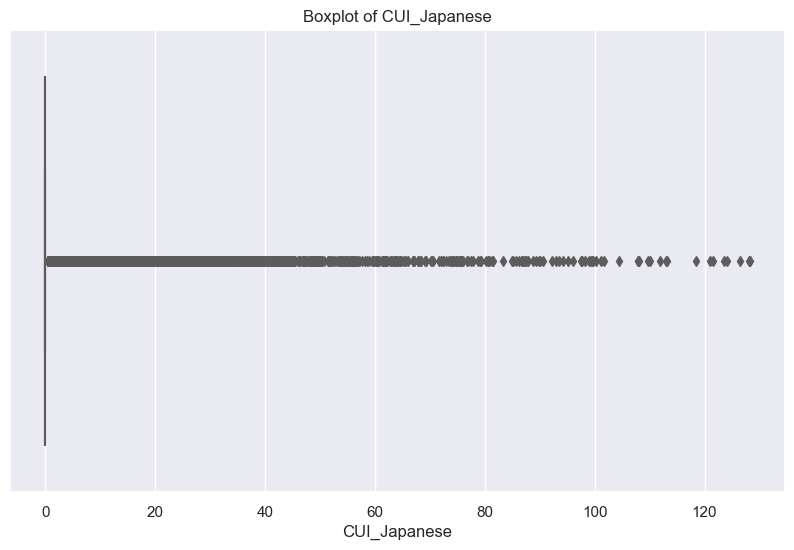

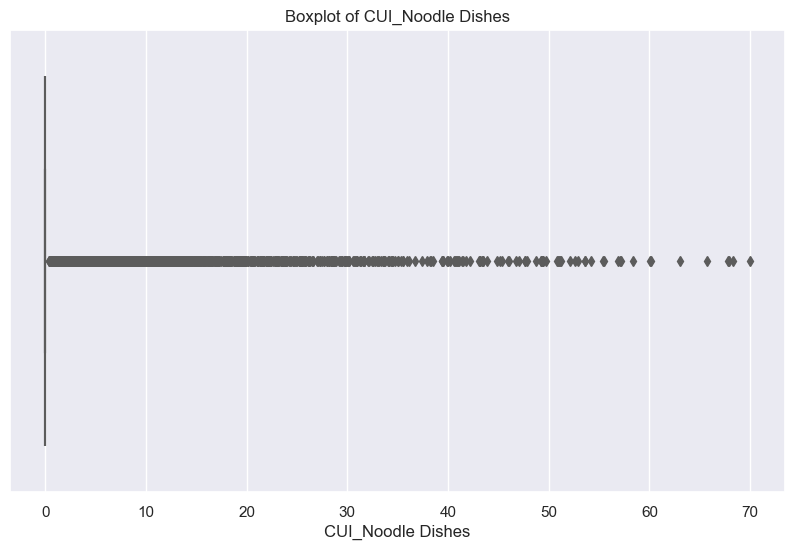

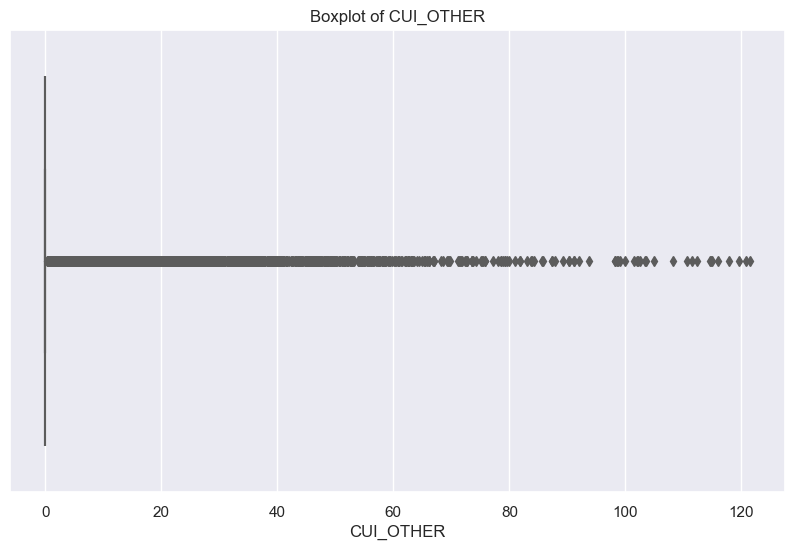

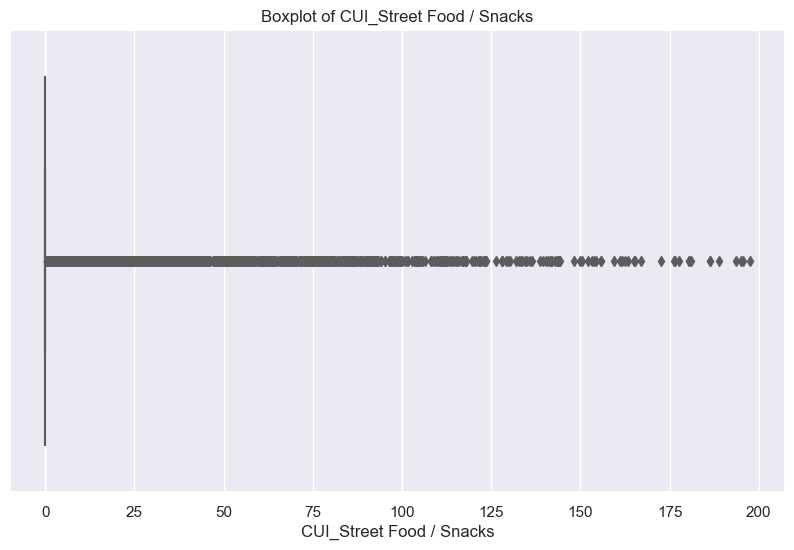

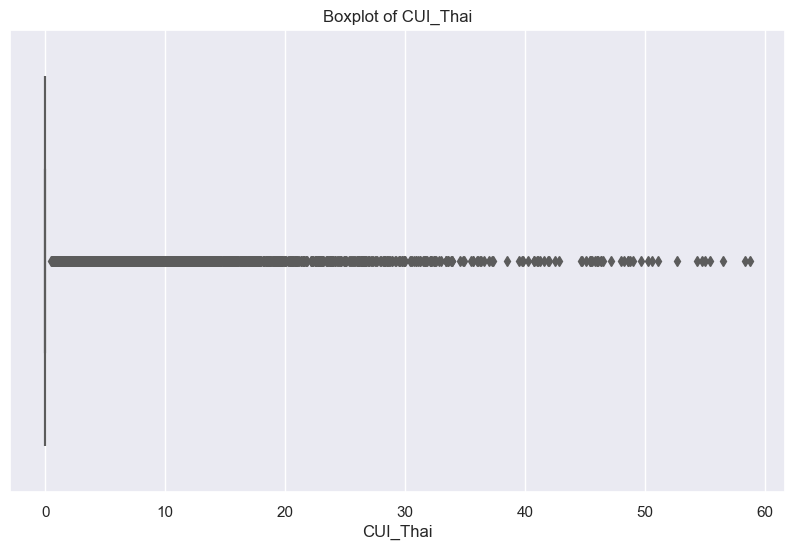

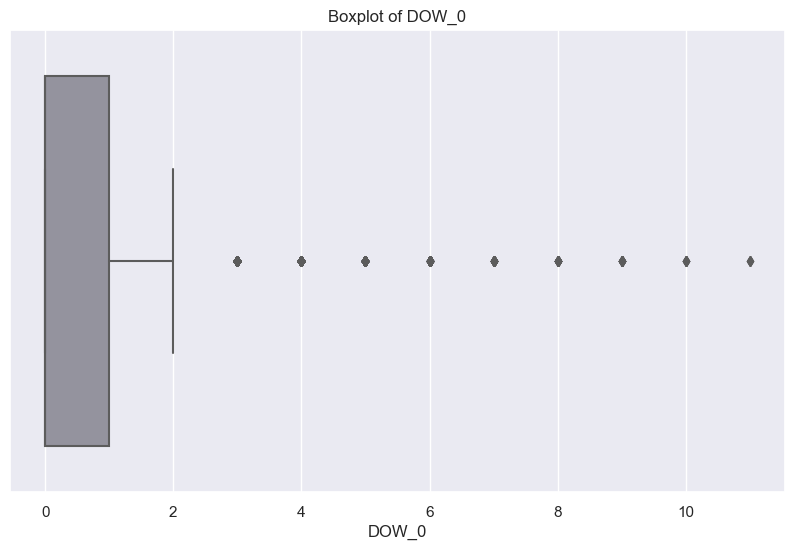

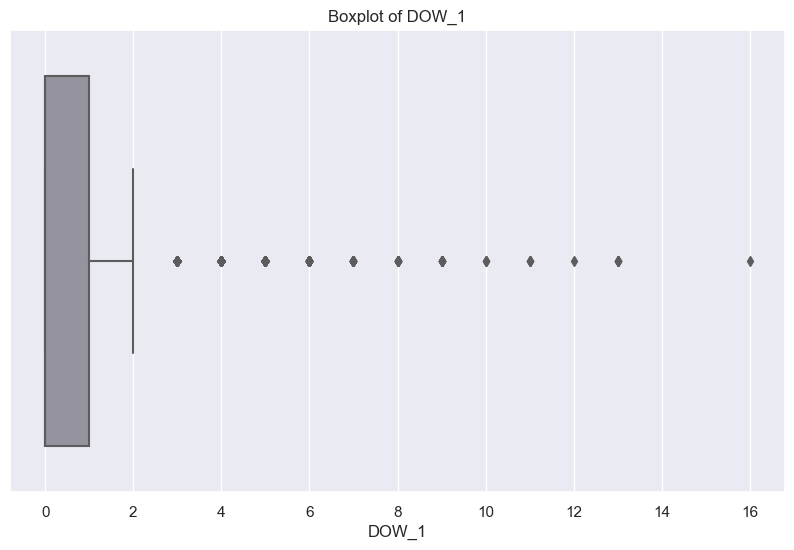

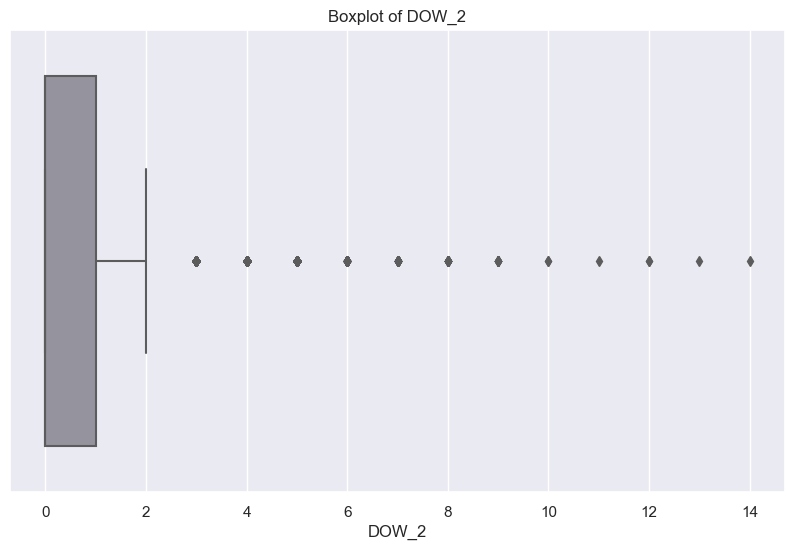

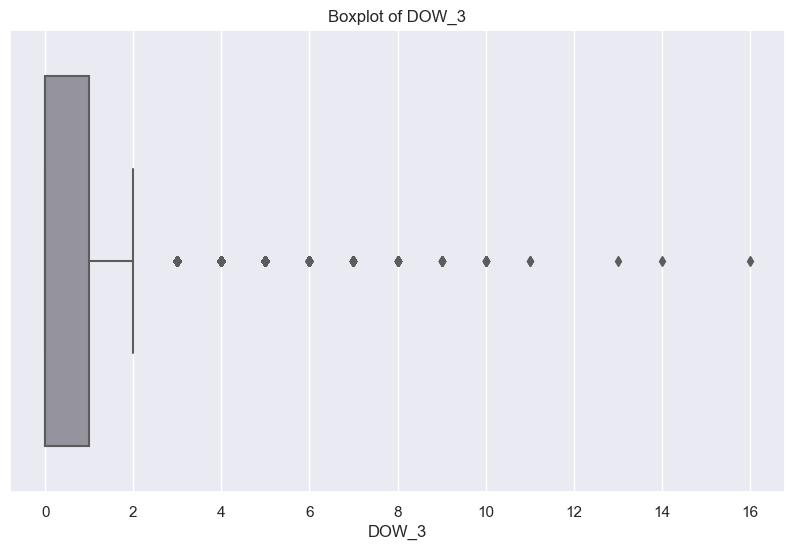

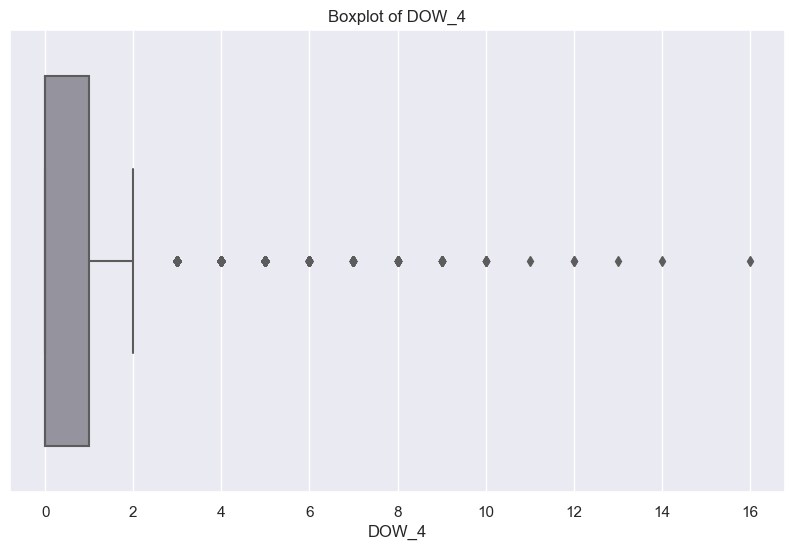

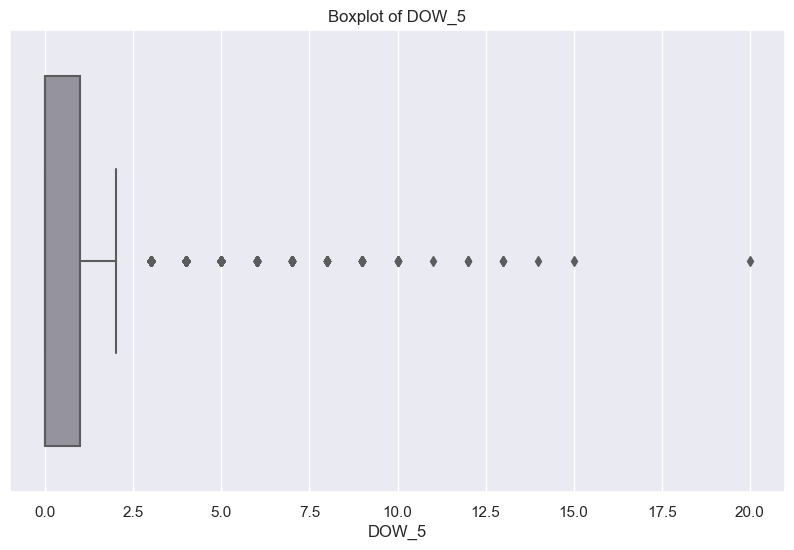

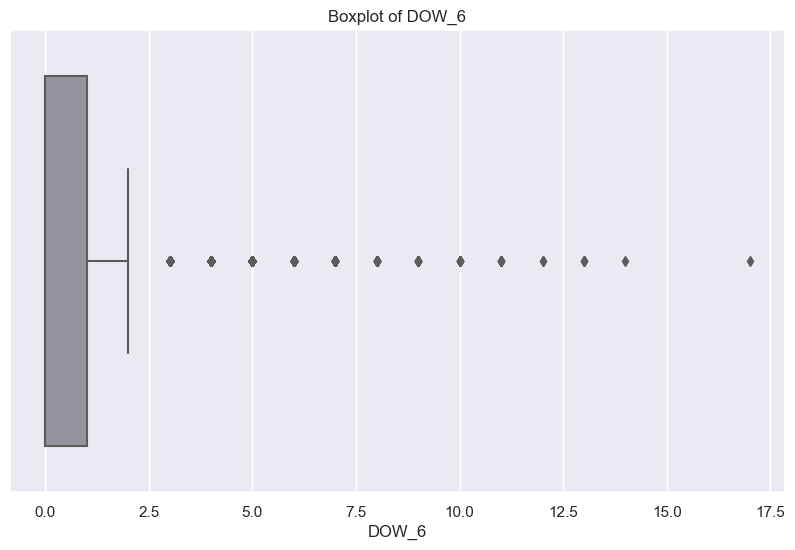

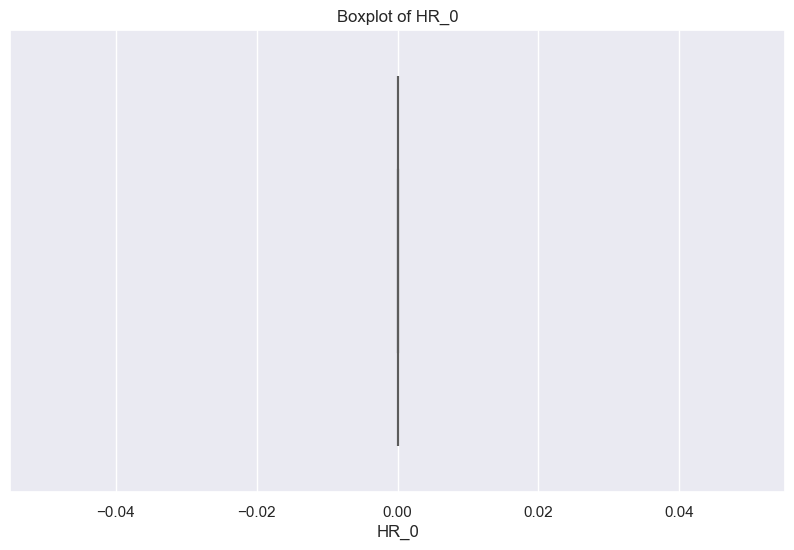

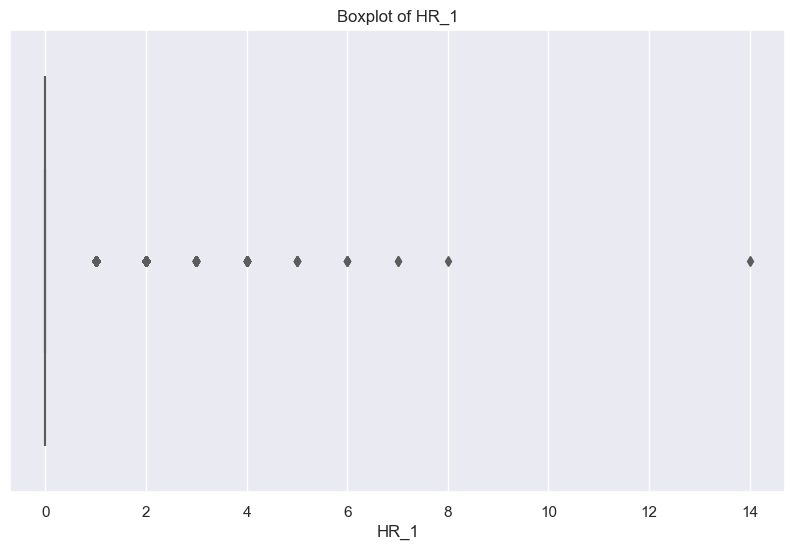

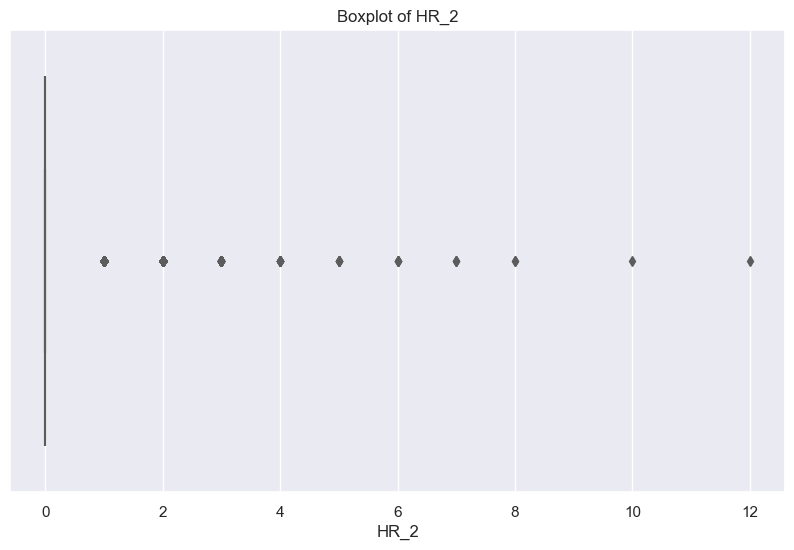

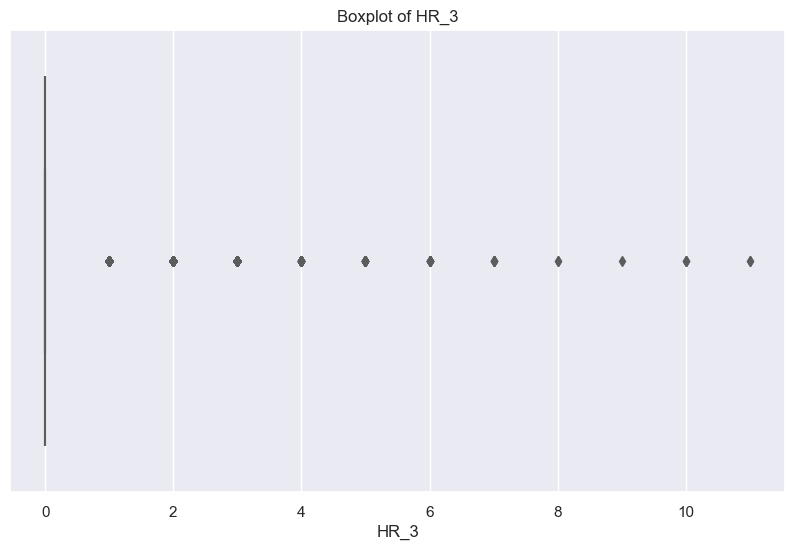

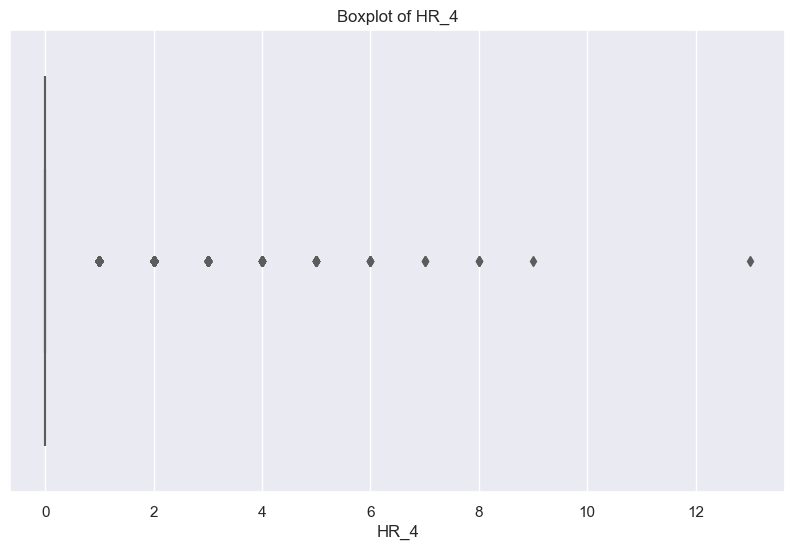

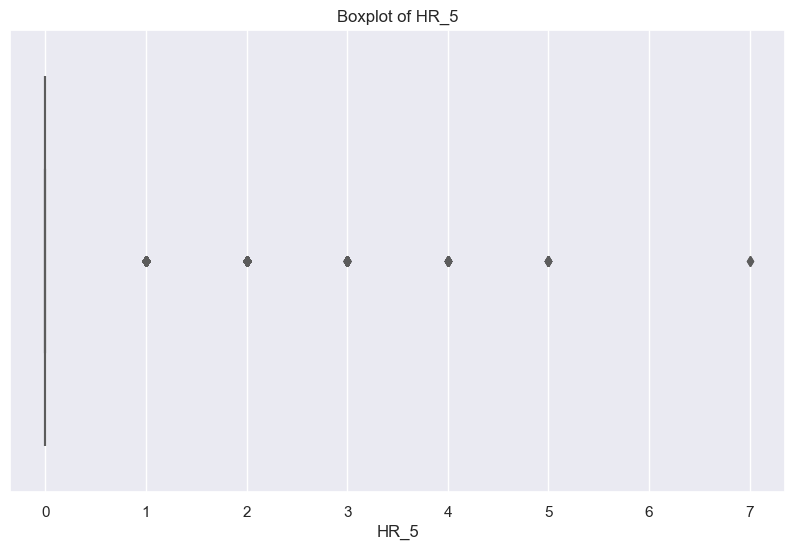

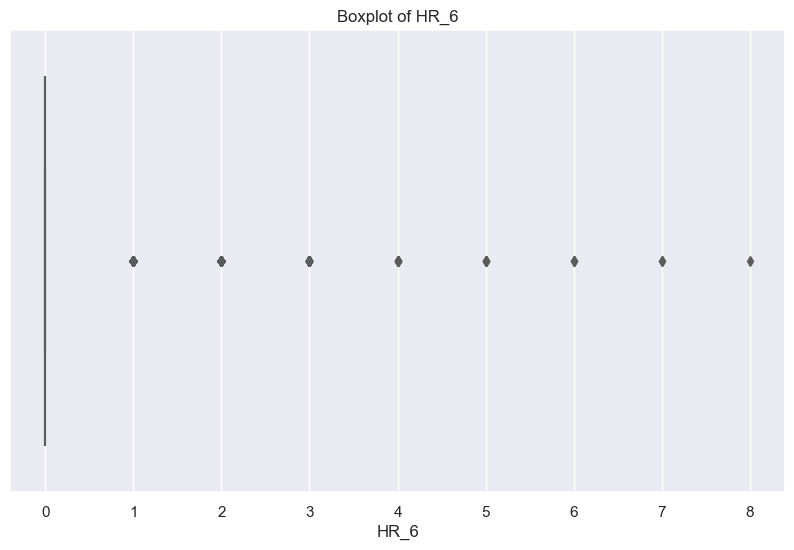

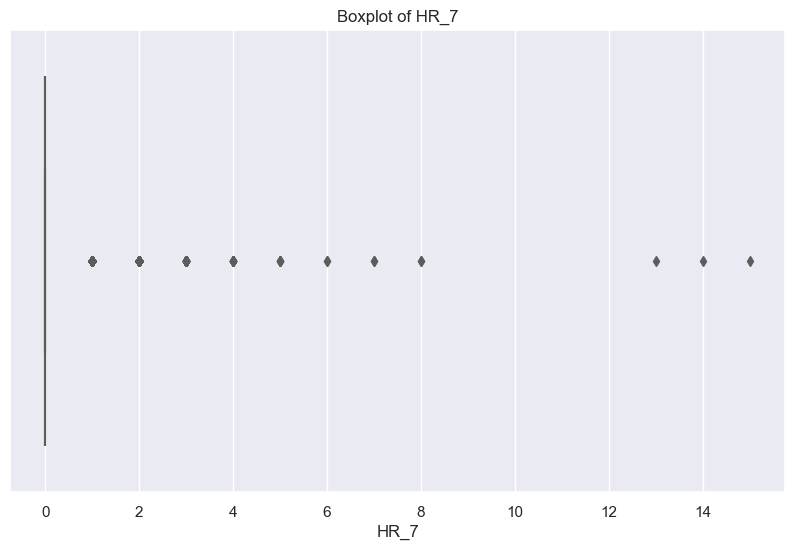

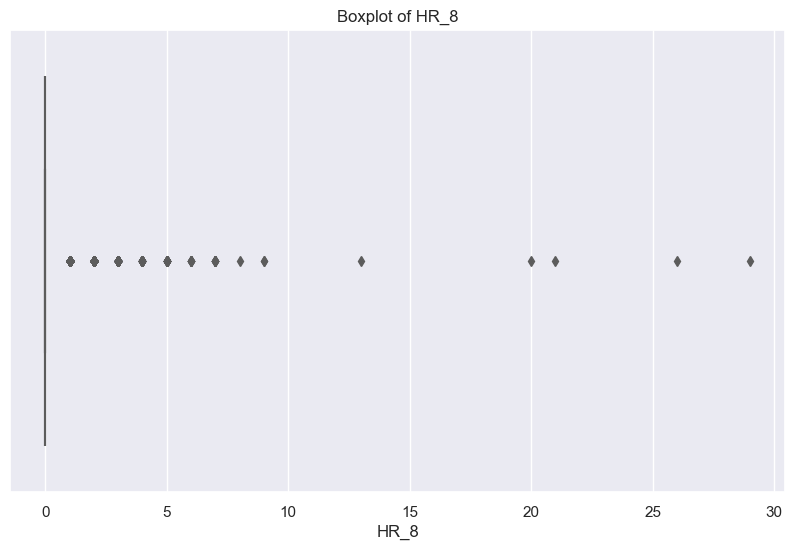

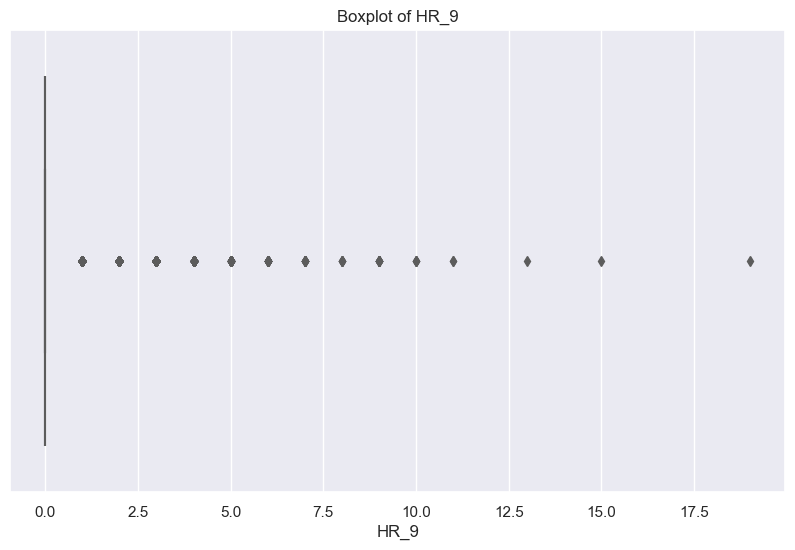

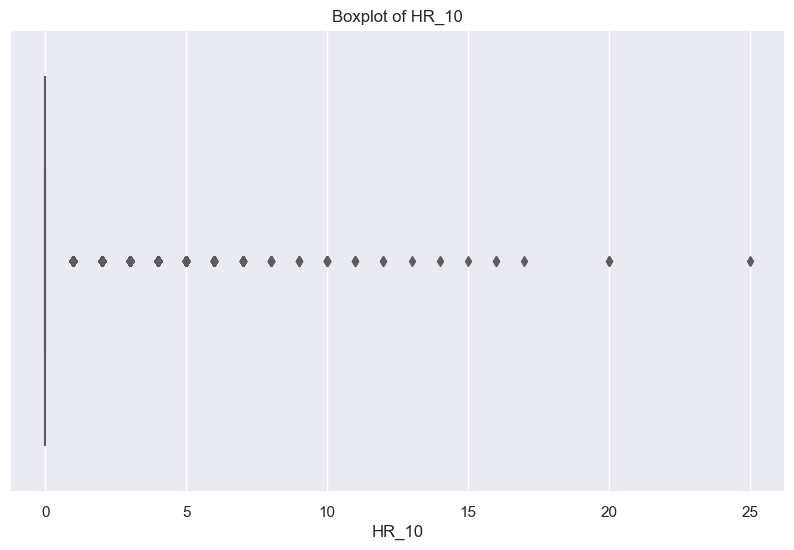

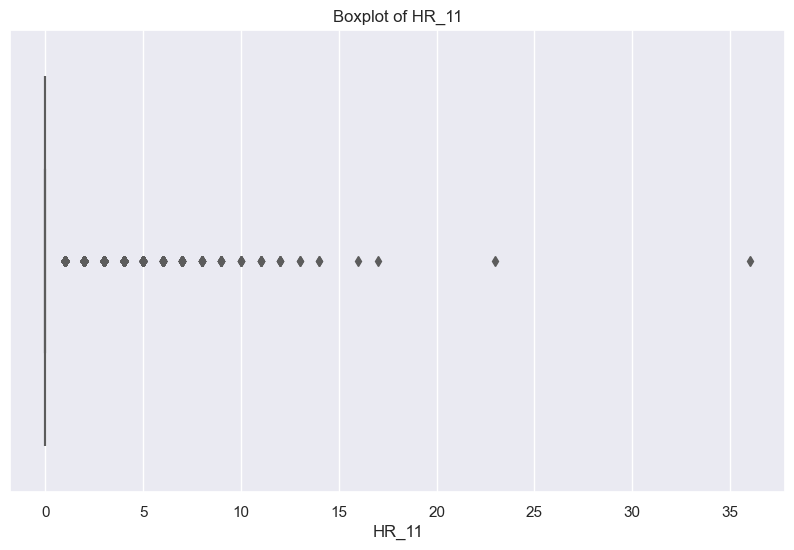

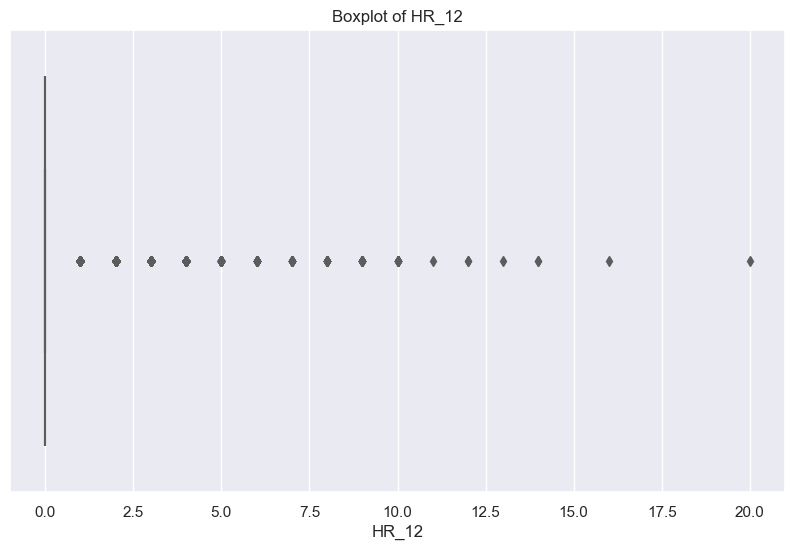

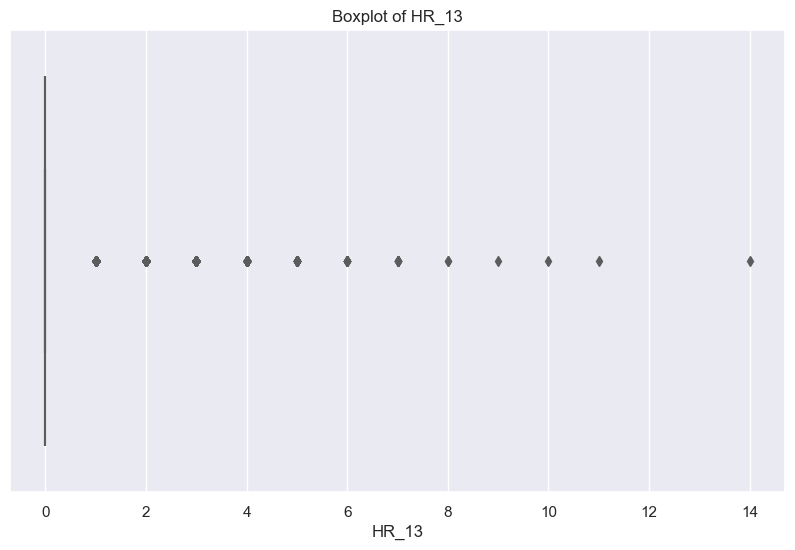

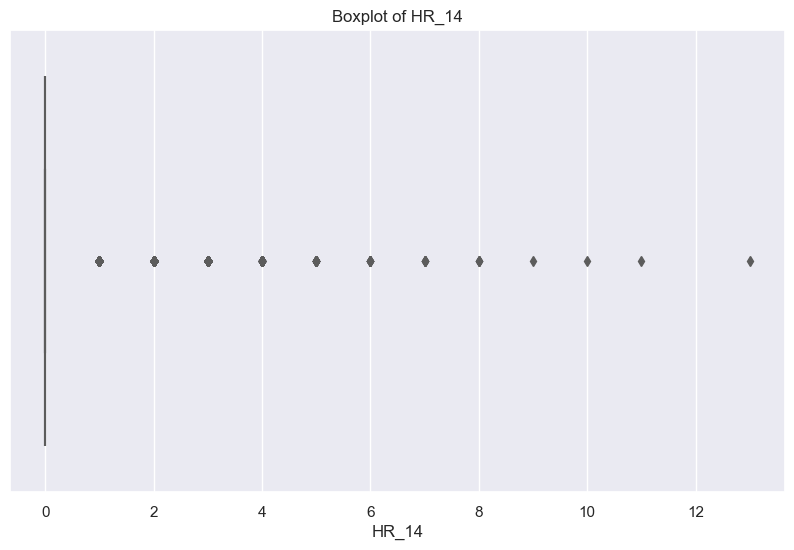

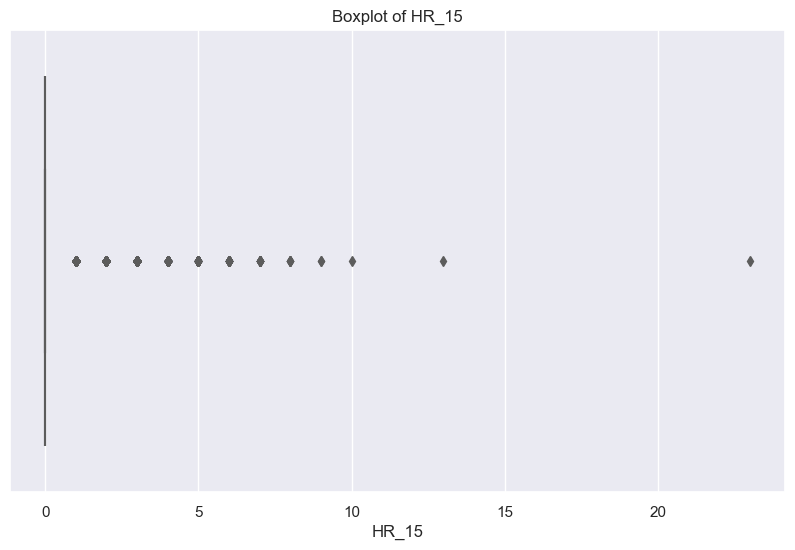

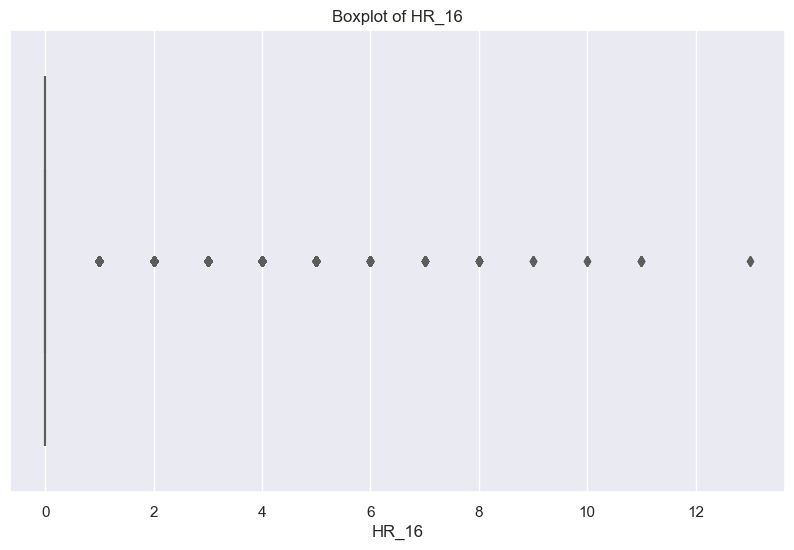

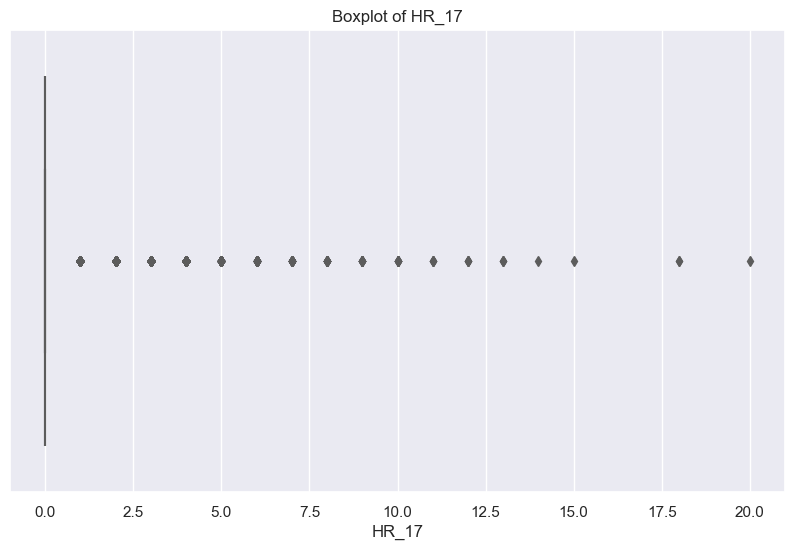

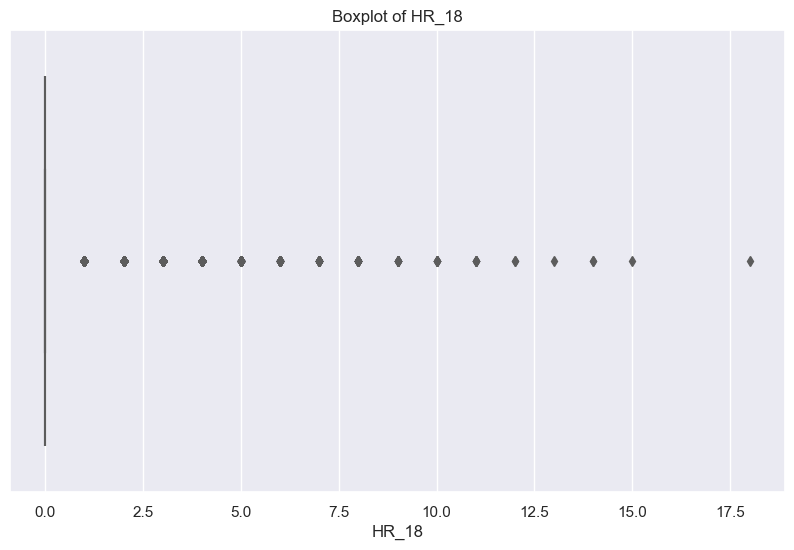

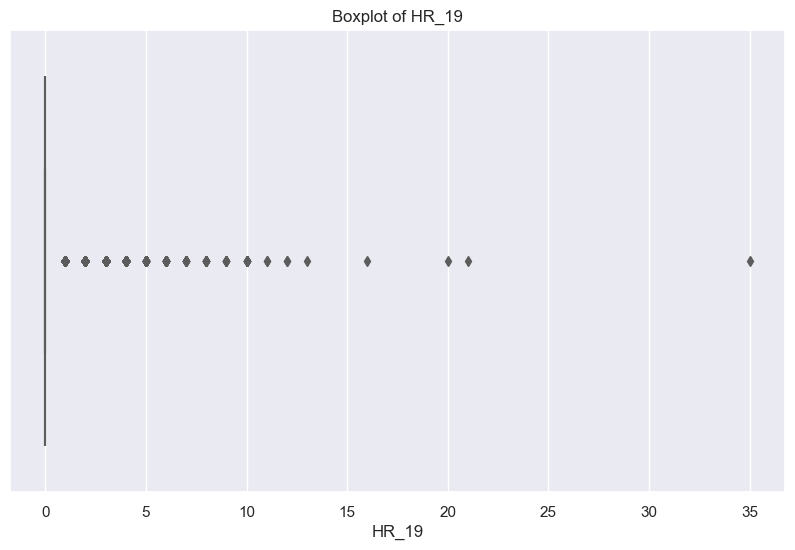

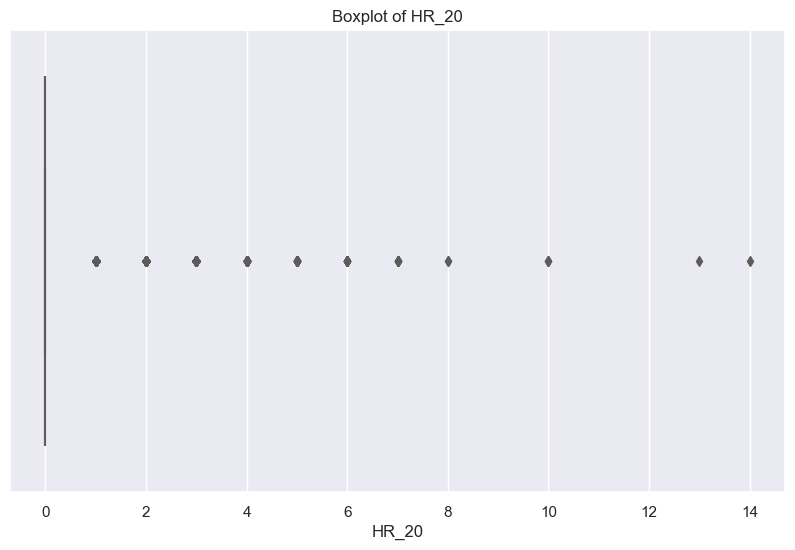

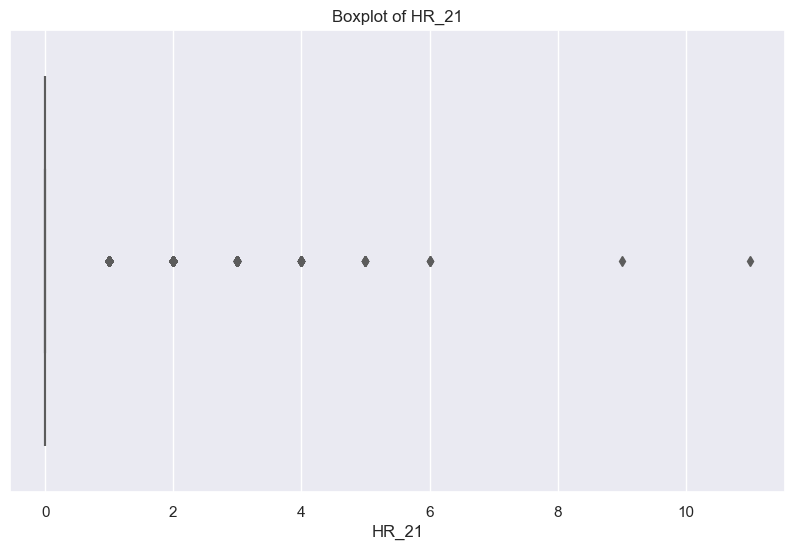

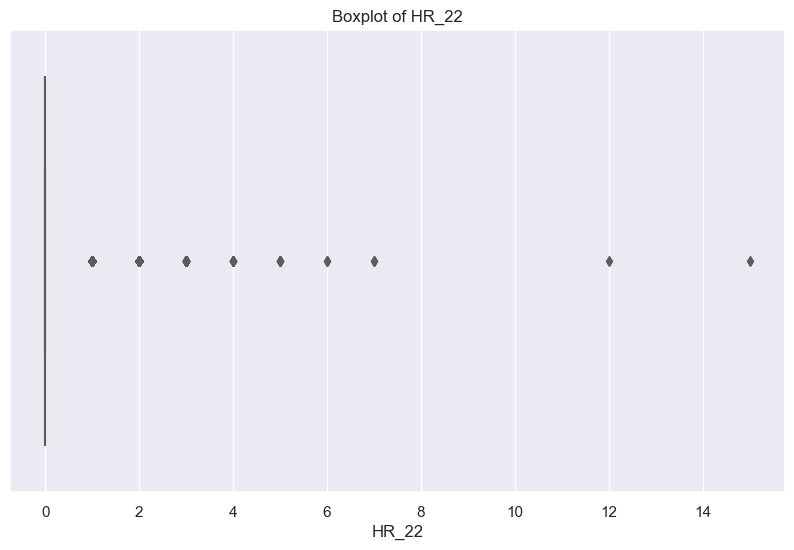

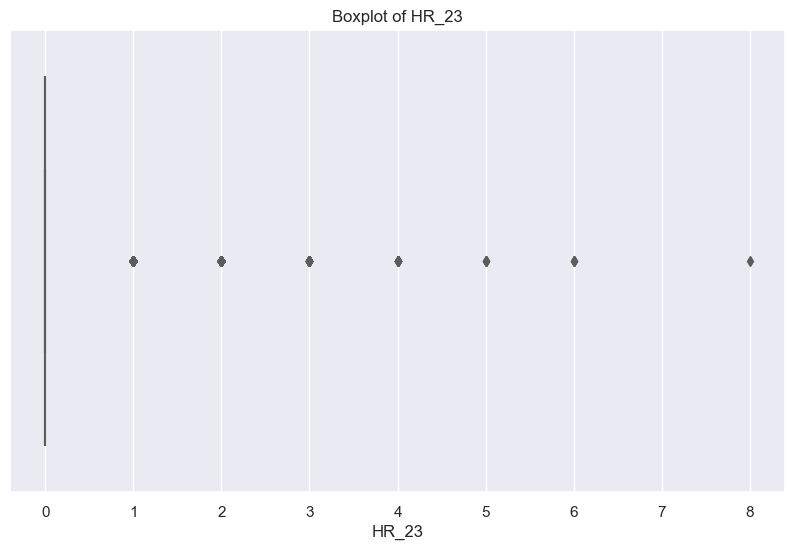

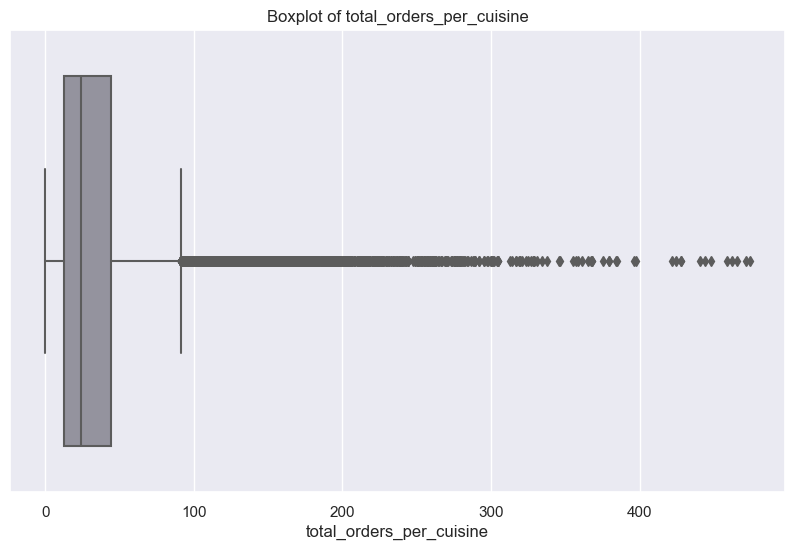

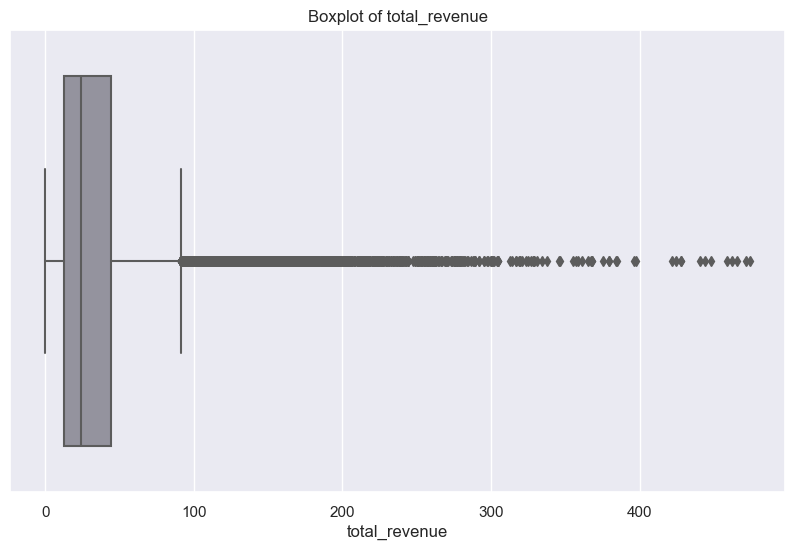

In [107]:
for feature in metric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_filtered, x=feature, color="#9391A0")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()